In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
plt.style.use("fivethirtyeight")
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from pandas.tseries.offsets import BDay

In [34]:
# E-Commerce
SHOP = pd.read_csv('./Data_II/E-Commerce/SHOP.csv')
ETSY = pd.read_csv('./Data_II/E-Commerce/ETSY.csv')
WIX = pd.read_csv('./Data_II/E-Commerce/WIX.csv')
GDDY = pd.read_csv('./Data_II/E-Commerce/GDDY.csv')

# Food
KR = pd.read_csv('./Data_II/Food/KR.csv')
MCD = pd.read_csv('./Data_II/Food/MCD.csv')
CMG = pd.read_csv('./Data_II/Food/CMG.csv')
SBUX = pd.read_csv('./Data_II/Food/SBUX.csv')

# Retail
BBY = pd.read_csv('./Data_II/Retail/BBY.csv')
HD = pd.read_csv('./Data_II/Retail/HD.csv')
WMT = pd.read_csv('./Data_II/Retail/WMT.csv')
TGT = pd.read_csv('./Data_II/Retail/TGT.csv')

# Finance
C = pd.read_csv('./Data_II/Finance/C.csv')
GDOT = pd.read_csv('./Data_II/Finance/GDOT.csv')
JPM = pd.read_csv('./Data_II/Finance/JPM.csv')
PYPL = pd.read_csv('./Data_II/Finance/PYPL.csv')

# S&P 500
SP500 = pd.read_csv('./Data_II/^GSPC.csv')

TGT.head()

Date       Open       High        Low      Close  Adj Close   Volume
0  2016-01-11  71.529999  72.750000  70.510002  72.419998  61.835979  6369700
1  2016-01-12  72.970001  73.550003  72.629997  73.360001  62.638607  4851100
2  2016-01-13  73.290001  73.750000  71.550003  71.639999  61.169975  5963500
3  2016-01-14  71.620003  71.639999  70.000000  70.410004  60.119747  6283200
4  2016-01-15  68.830002  70.589996  68.830002  70.080002  59.837971  7435800

# Data Cleansing

In [35]:
# E-Commerce
columns_to_keep = ['Date', 'Close', 'Volume']
SHOP = SHOP[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
ETSY = ETSY[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
WIX = WIX[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
GDDY = GDDY[columns_to_keep]


# Food
columns_to_keep = ['Date', 'Close', 'Volume']
KR = KR[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
MCD = MCD[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
CMG = CMG[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
SBUX = SBUX[columns_to_keep]


# Retail
columns_to_keep = ['Date', 'Close', 'Volume']
BBY = BBY[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
HD = HD[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
WMT = WMT[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
TGT = TGT[columns_to_keep]


# Finance
columns_to_keep = ['Date', 'Close', 'Volume']
C = C[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
GDOT = GDOT[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
JPM = JPM[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
PYPL = PYPL[columns_to_keep]

columns_to_keep = ['Date', 'Close', 'Volume']
SP500 = SP500[columns_to_keep]

SBUX.head()

Date      Close    Volume
0  2016-01-11  57.820000  10757300
1  2016-01-12  59.459999  12375800
2  2016-01-13  57.869999  11303600
3  2016-01-14  58.980000  11444100
4  2016-01-15  58.000000  15246100

In [36]:
stock_close = SHOP[['Date','Close']].merge(ETSY[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY']

stock_close = stock_close.merge(WIX[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX']

stock_close = stock_close.merge(GDDY[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY']

stock_close = stock_close.merge(KR[['Date','Close']])
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR']

stock_close = stock_close.merge(MCD[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD']

stock_close = stock_close.merge(CMG[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG']

stock_close = stock_close.merge(SBUX[['Date','Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX']

stock_close = stock_close.merge(BBY[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY']

stock_close = stock_close.merge(HD[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD']

stock_close = stock_close.merge(TGT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT']

stock_close = stock_close.merge(WMT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT']

stock_close = stock_close.merge(C[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C']

stock_close = stock_close.merge(JPM[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM']

stock_close = stock_close.merge(PYPL[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM', 'PYPL']

stock_close = stock_close.merge(GDOT[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM', 'PYPL', 'GDOT']

stock_close = stock_close.merge(SP500[['Date', 'Close']], on='Date')
stock_close.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD', 'TGT', 'WMT'
                       , 'C', 'JPM', 'PYPL', 'GDOT', 'SP500']
# # E-Commerce DF
# e_com = SHOP[['Date','Close']].merge(ETSY[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY']
# e_com = e_com.merge(WIX[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX']
# e_com = e_com.merge(GDDY[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY']
# e_com = e_com.merge(SP500[['Date','Close']], on='Date')
# e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY', 'SP500']

# # Food DF
# food = KR[['Date','Close']].merge(MCD[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD']
# food = food.merge(CMG[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD', 'CMG']
# food = food.merge(SBUX[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD', 'CMG', 'SBUX']
# food = food.merge(SP500[['Date','Close']], on='Date')
# food.columns = ['Date', 'KR', 'MCD', 'CMG', 'SBUX', 'SP500']

# # Retail DF
# # retail = BBY[['Date','Close']].merge(HD[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD']
# # retail = retail.merge(WMT[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD', 'WMT']
# # retail = retail.merge(TGT[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD', 'WMT','TGT']
# # retail = retail.merge(SP500[['Date','Close']], on='Date')
# # retail.columns = ['Date', 'BBY', 'HD', 'WMT','TGT', 'SP500']

# retail = BBY[['Date', 'Close']].merge(HD[['Date', 'Close']], on='Date')
# retail.columns = ['Date', 'BBY', 'HD']

# retail = retail.merge(WMT[['Date', 'Close']], on='Date')
# retail.columns = ['Date', 'BBY', 'HD', 'WMT']

# # Finance DF
# finance=C[['Date', 'Close']].merge(GDOT[['Date', 'Close']], on='Date')
# finance.columns=['Date', 'C', 'GDOT']
# finance=finance.merge(JPM[['Date', 'Close']], on='Date')
# finance.columns=['Date', 'C', 'GDOT', 'JPM']
# finance=finance.merge(PYPL[['Date', 'Close']], on='Date')
# finance.columns=['Date', 'C', 'GDOT', 'JPM', 'PYPL']
# finance = finance.merge(SP500[['Date','Close']], on='Date')
# finance.columns = ['Date', 'C', 'GDOT', 'JPM', 'PYPL', 'SP500']

stock_close.to_excel('stock_close.xlsx', index=True)
stock_close.head()


Date       SHOP  ETSY        WIX       GDDY         KR         MCD  \
0  2016-01-11  23.870001  7.44  21.950001  30.670000  41.279999  116.690002   
1  2016-01-12  23.740000  7.35  22.270000  30.250000  41.240002  117.440002   
2  2016-01-13  21.379999  6.99  20.760000  29.549999  39.200001  115.120003   
3  2016-01-14  20.639999  7.07  21.150000  29.559999  39.029999  116.620003   
4  2016-01-15  19.889999  7.00  21.040001  29.170000  38.490002  115.180000   

          CMG       SBUX        BBY          HD        TGT        WMT  \
0  411.100006  57.820000  29.430000  125.779999  72.419998  64.220001   
1  404.260010  59.459999  30.129999  127.489998  73.360001  63.619999   
2  428.279999  57.869999  29.260000  121.400002  71.639999  61.919998   
3  454.299988  58.980000  26.430000  119.620003  70.410004  63.060001   
4  475.940002  58.000000  27.110001  119.230003  70.080002  61.930000   

           C        JPM       PYPL   GDOT        SP500  
0  46.849998  58.830002  33.040001  15.85  1923.670044  
1  46.880001  58.959999  33.080002  15.81  1938.680054  
2  45.189999  57.340000  32.119999  15.43  1890.280029  
3  45.380001  58.200001  32.869999  15.80  1921.839966  
4  42.470001  57.040001  32.310001  15.87  1880.329956

# Line Chart Comparison

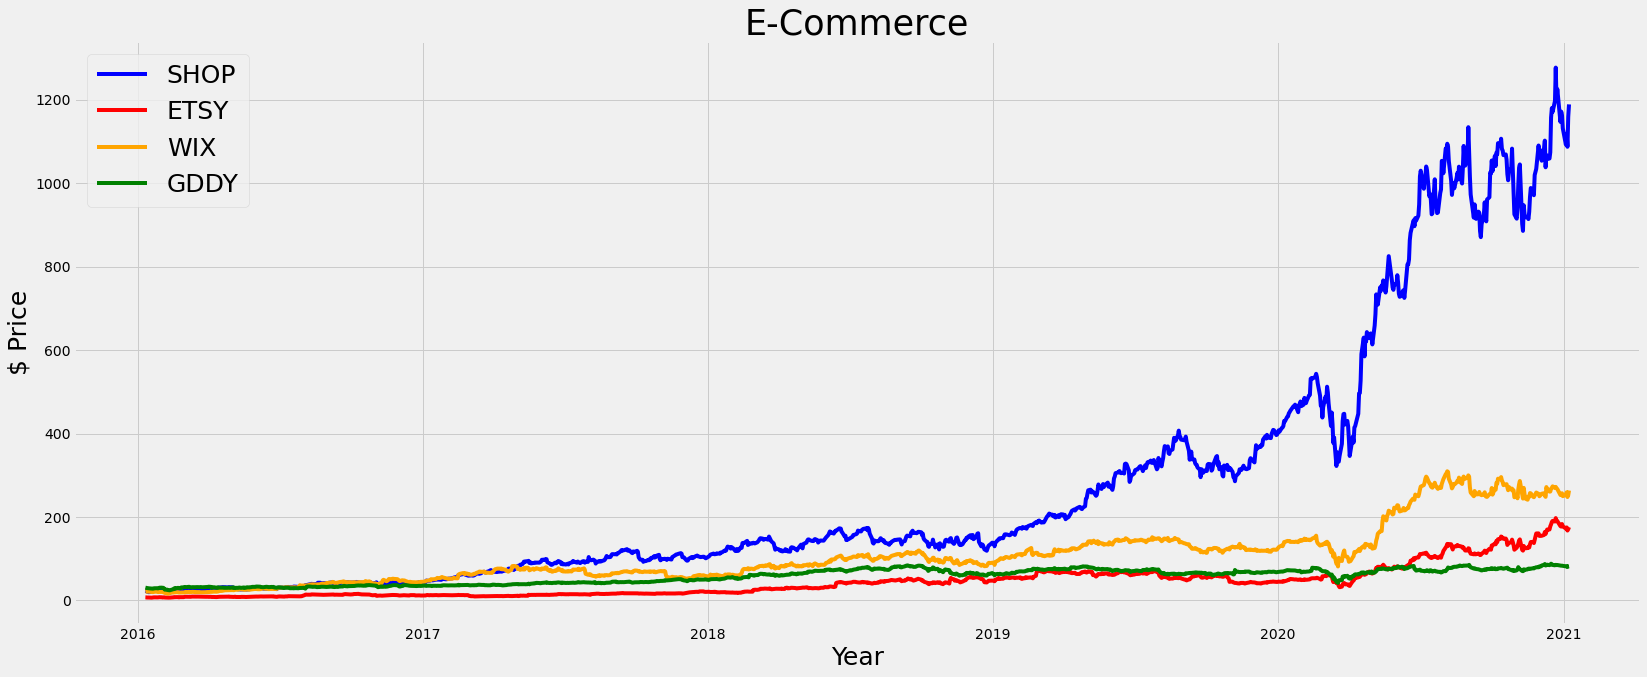

In [37]:
mpl.rcParams['figure.figsize']=(25,10)
stock_close['Date']=pd.to_datetime(stock_close['Date'])
stock_close.set_index('Date',inplace=True)
plt.plot('SHOP', color='blue', data=stock_close, label='SHOP')
plt.plot('ETSY', color='red', data=stock_close, label='ETSY')
plt.plot('WIX', color='orange', data=stock_close, label='WIX')
plt.plot('GDDY', color='green', data=stock_close, label='GDDY')
plt.legend(loc='upper left', fontsize='25')
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('E-Commerce', fontsize=35)
# plt.figure(figsize=(20,20))
plt.show()

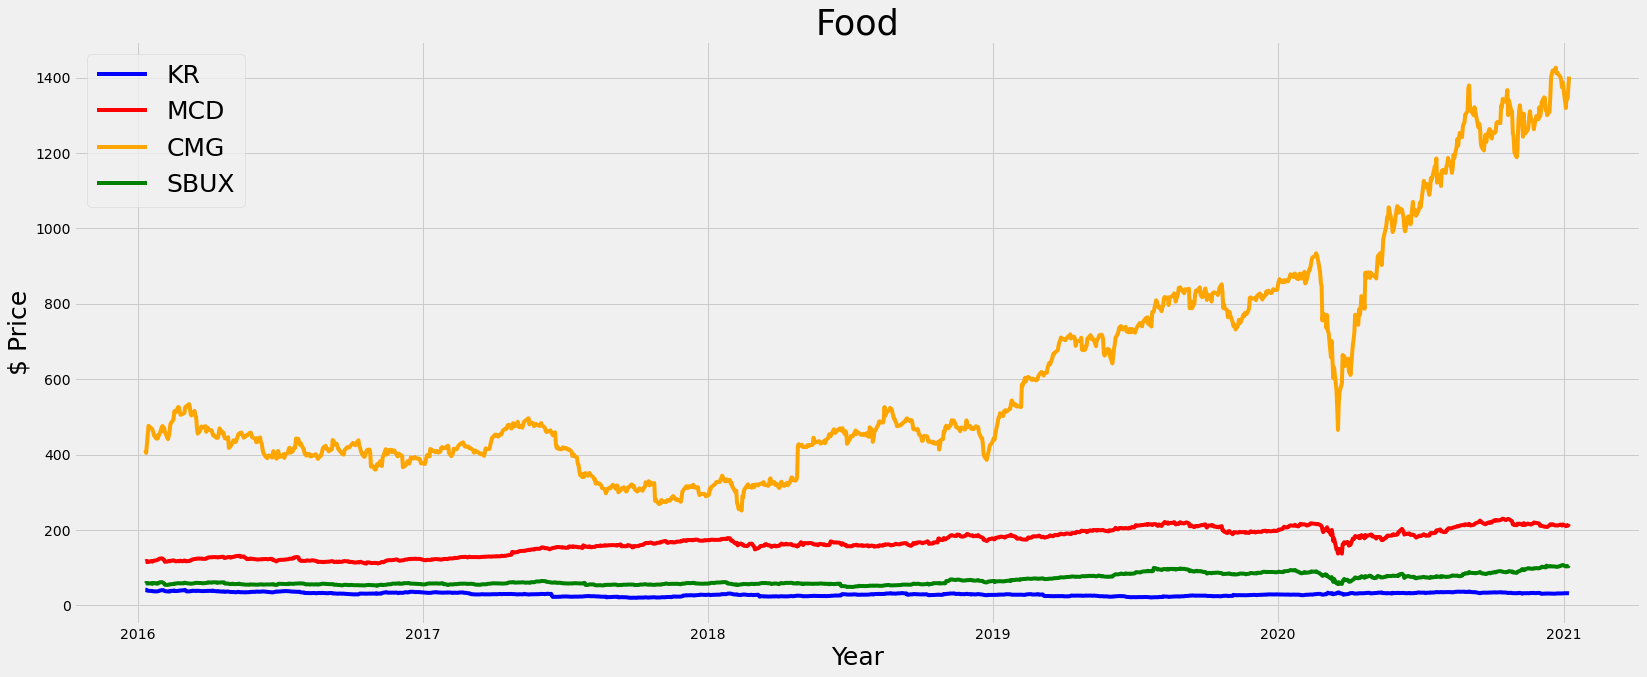

In [38]:
plt.plot('KR', color='blue', data=stock_close, label='KR')
plt.plot('MCD', color='red', data=stock_close, label='MCD')
plt.plot('CMG', color='orange', data=stock_close, label='CMG')
plt.plot('SBUX', color='green', data=stock_close, label='SBUX')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Food', fontsize=35)
plt.show()

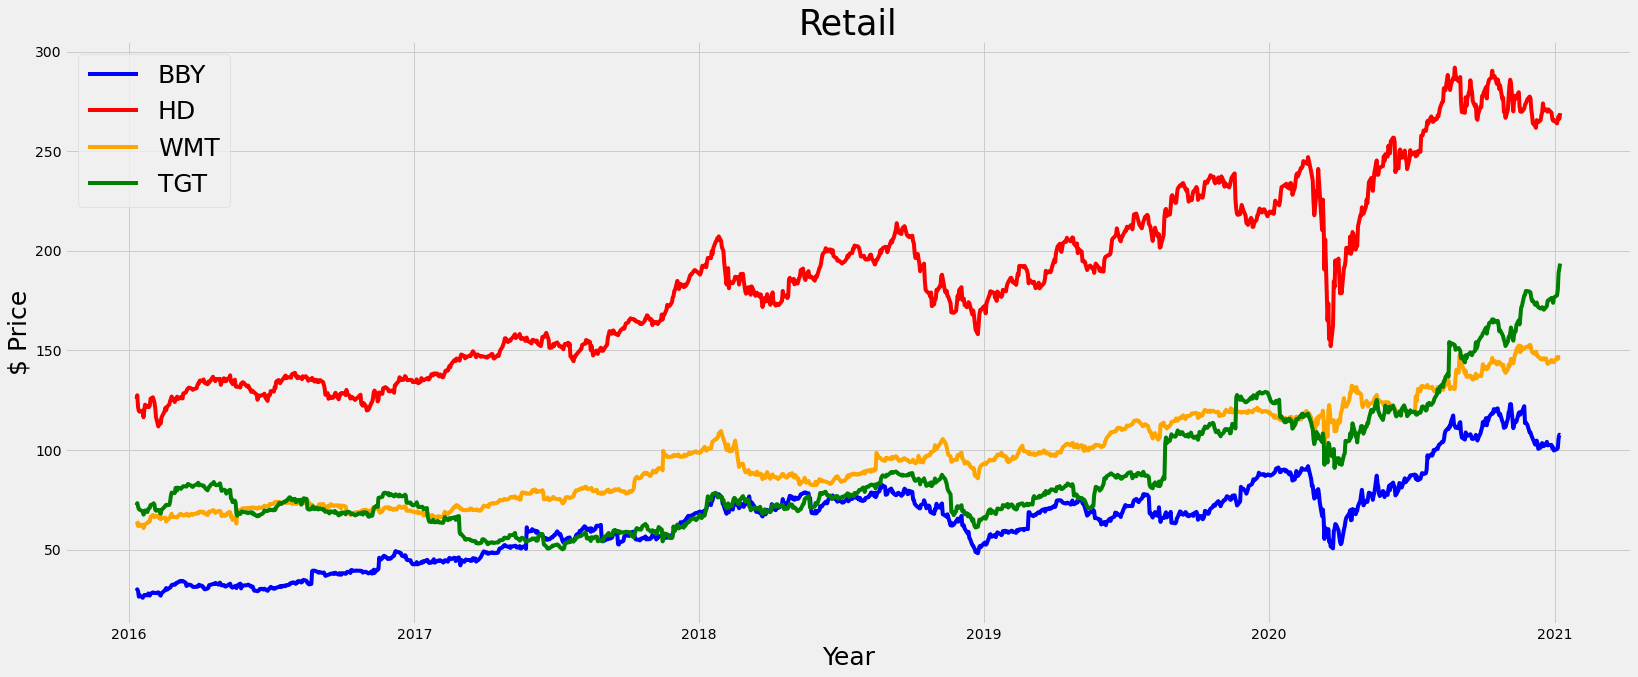

In [39]:
plt.plot('BBY', color='blue', data=stock_close, label='BBY')
plt.plot('HD', color='red', data=stock_close, label='HD')
plt.plot('WMT', color='orange', data=stock_close, label='WMT')
plt.plot('TGT', color='green', data=stock_close, label='TGT')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Retail', fontsize=35)
plt.show()

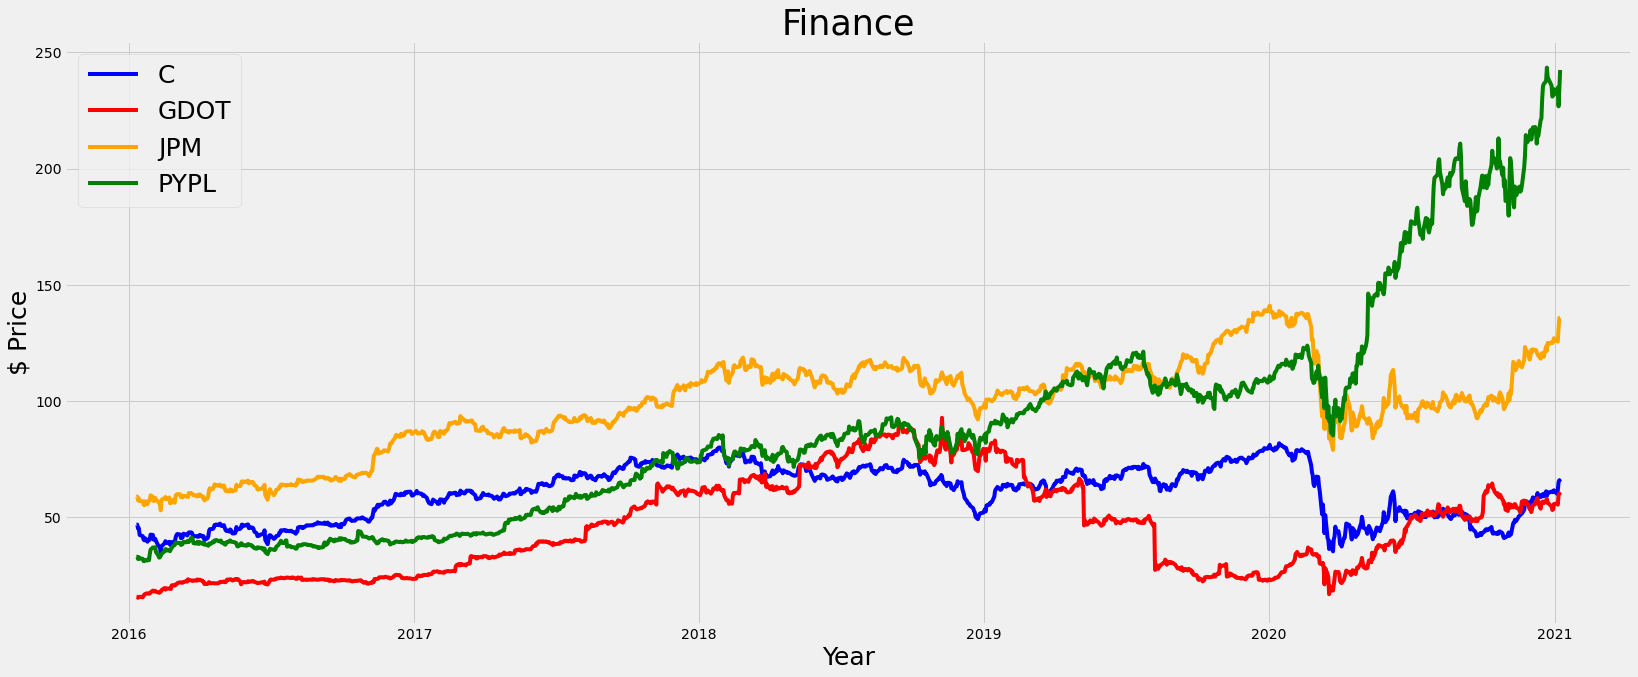

In [40]:
plt.plot('C', color='blue', data=stock_close, label='C')
plt.plot('GDOT', color='red', data=stock_close, label='GDOT')
plt.plot('JPM', color='orange', data=stock_close, label='JPM')
plt.plot('PYPL', color='green', data=stock_close, label='PYPL')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Finance', fontsize=35)
plt.show()

# Stock Performance VS Benchmark

In [41]:
listOfVariables = stock_close.drop(['SP500'], axis=1).columns
print(listOfVariables)

Index(['SHOP', 'ETSY', 'WIX', 'GDDY', 'KR', 'MCD', 'CMG', 'SBUX', 'BBY', 'HD',
       'TGT', 'WMT', 'C', 'JPM', 'PYPL', 'GDOT'],
      dtype='object')


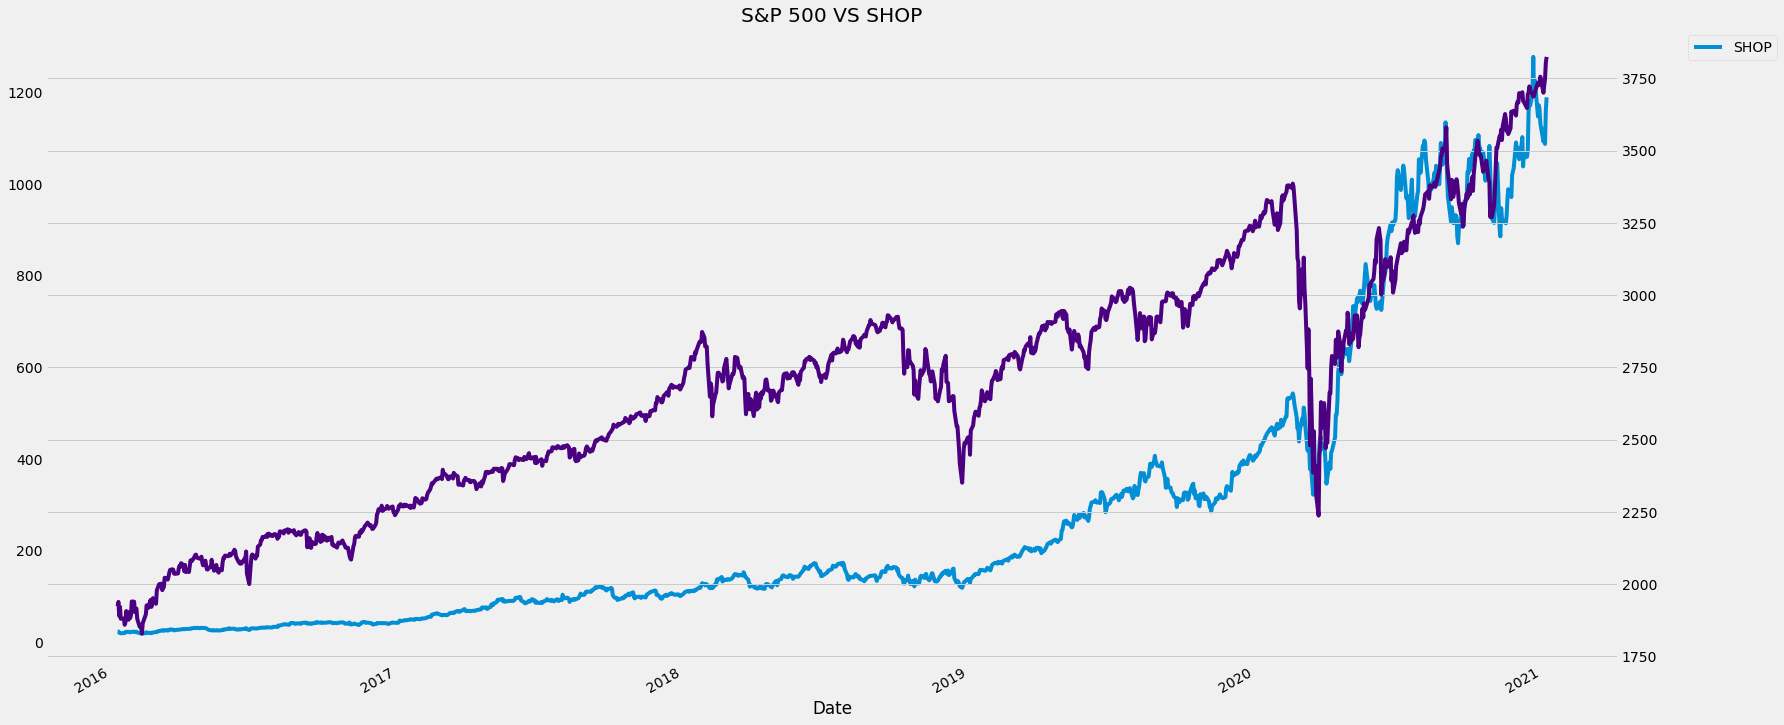

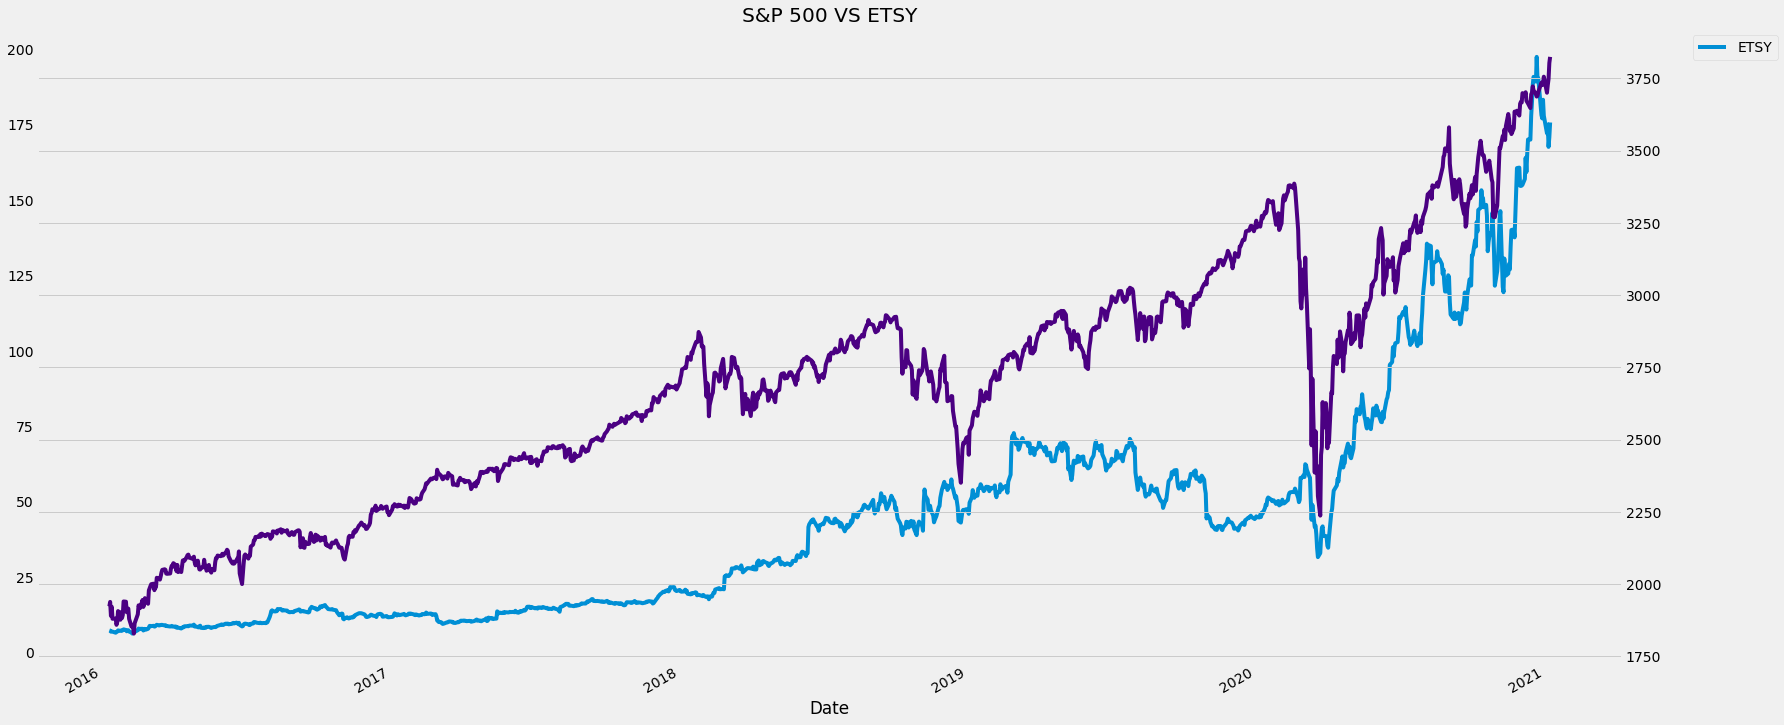

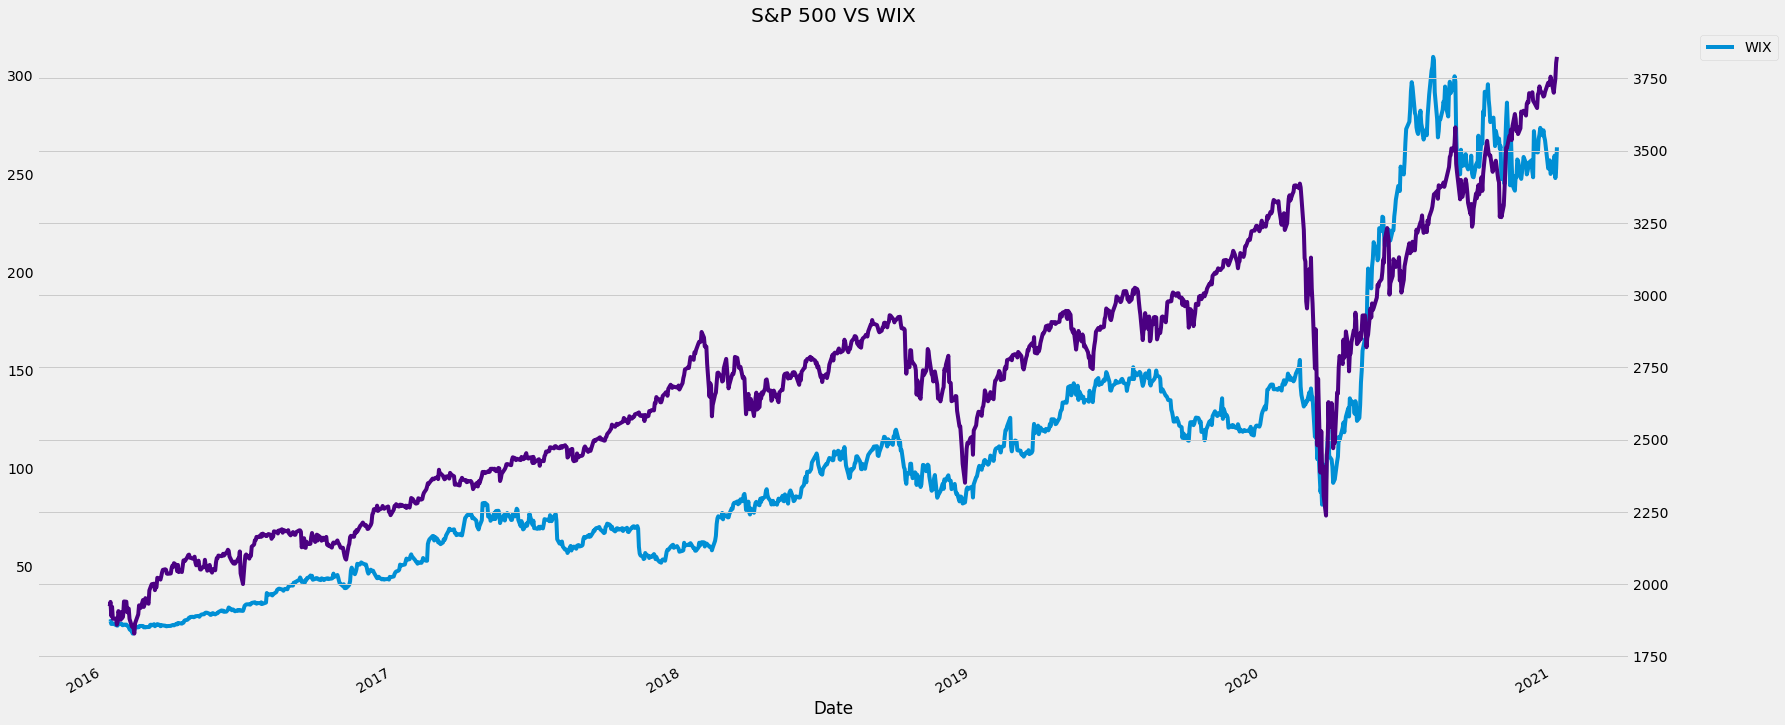

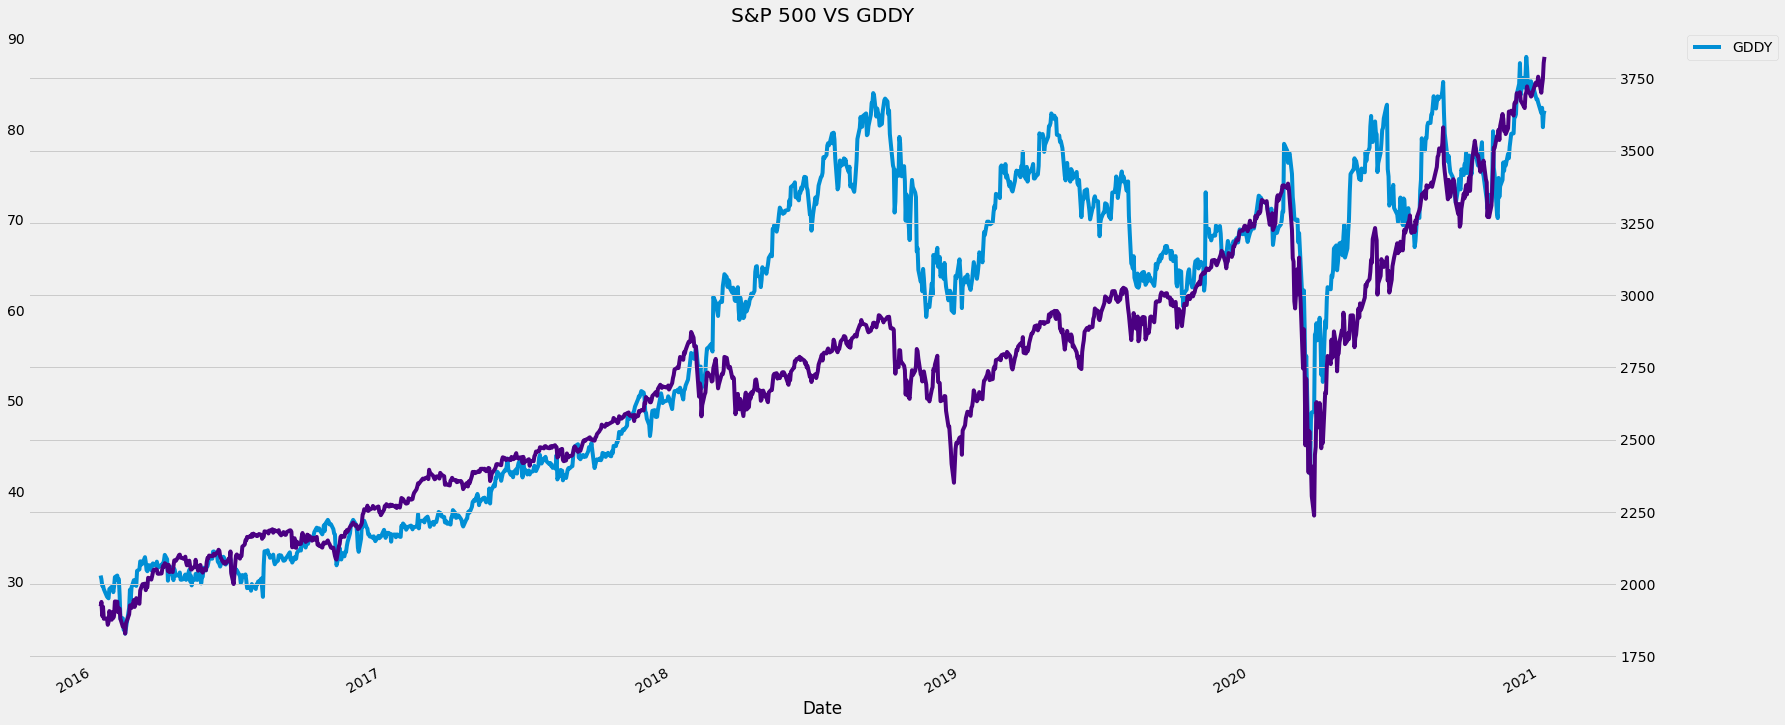

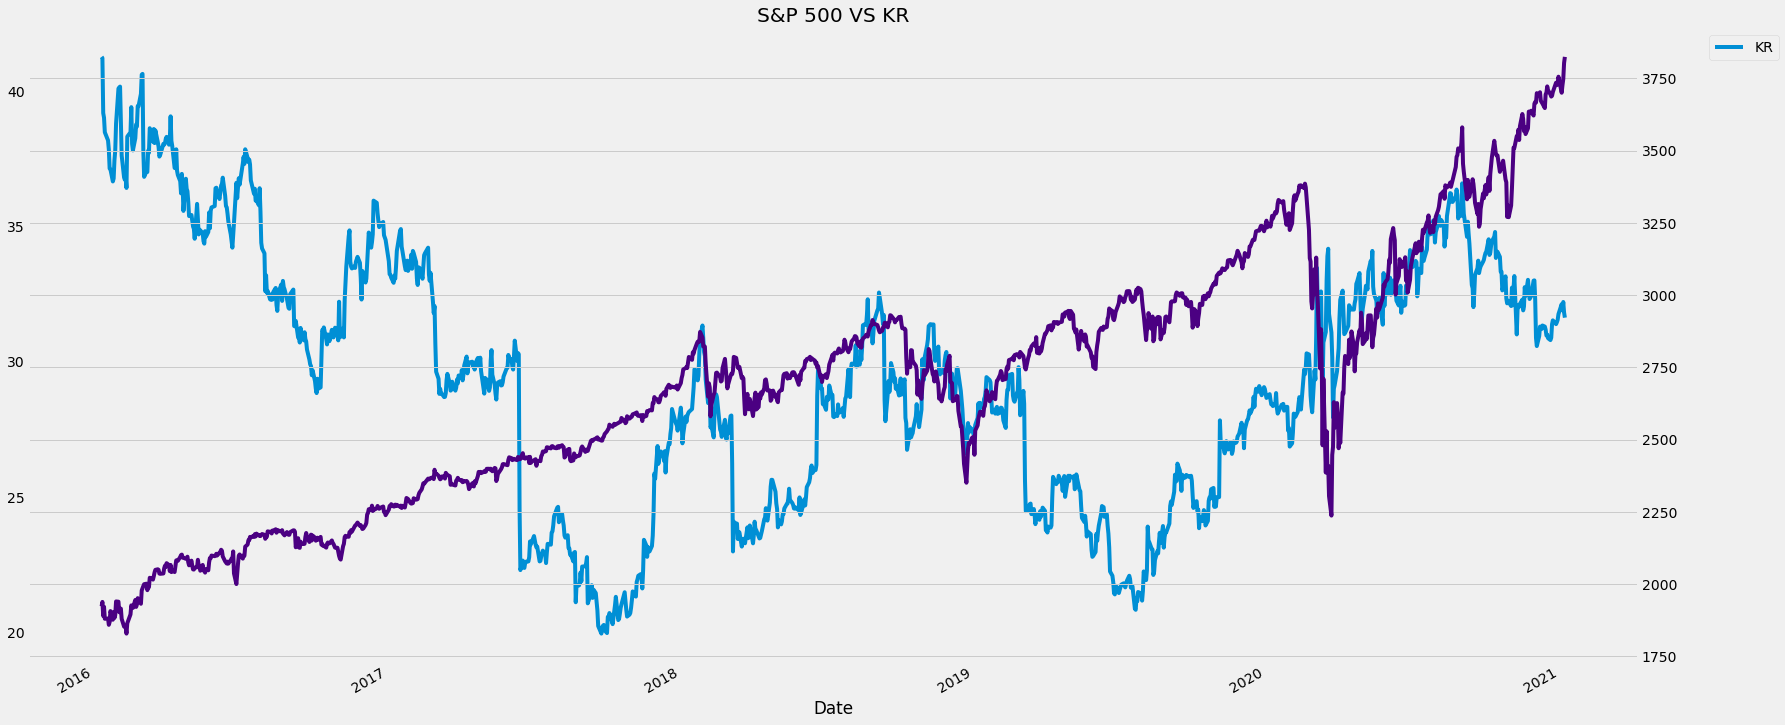

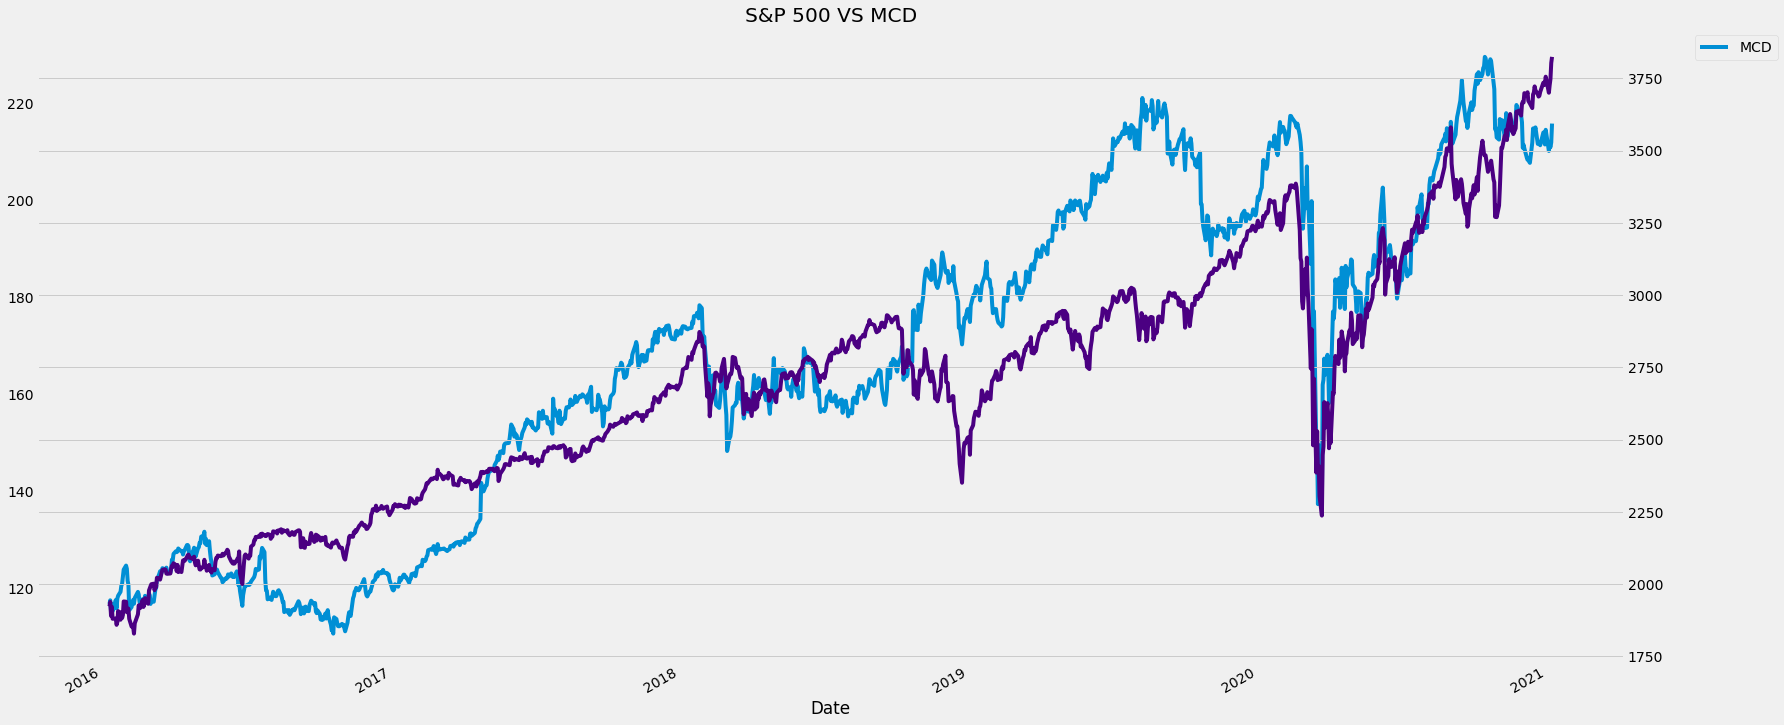

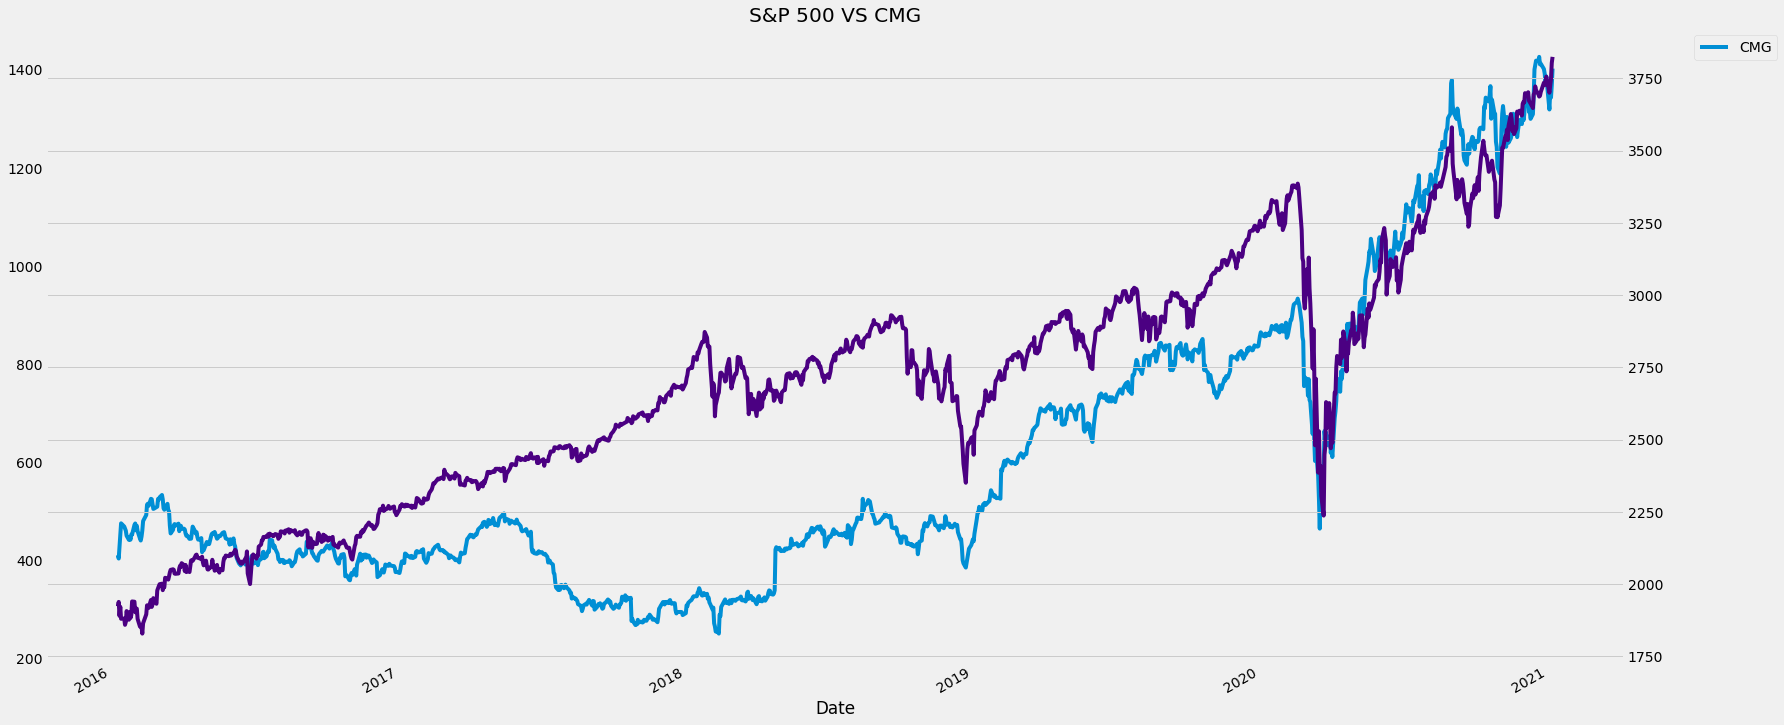

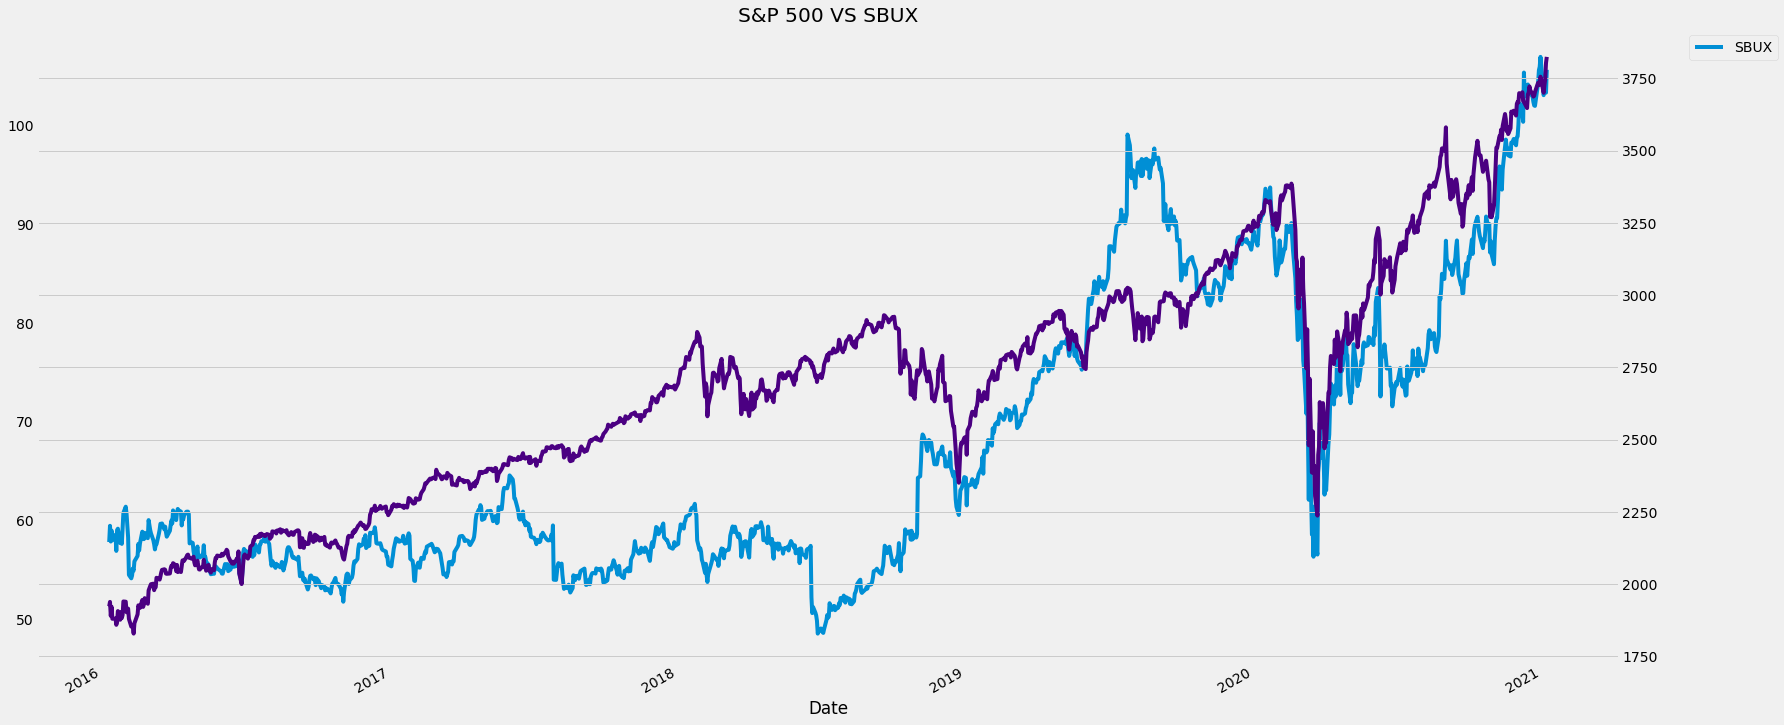

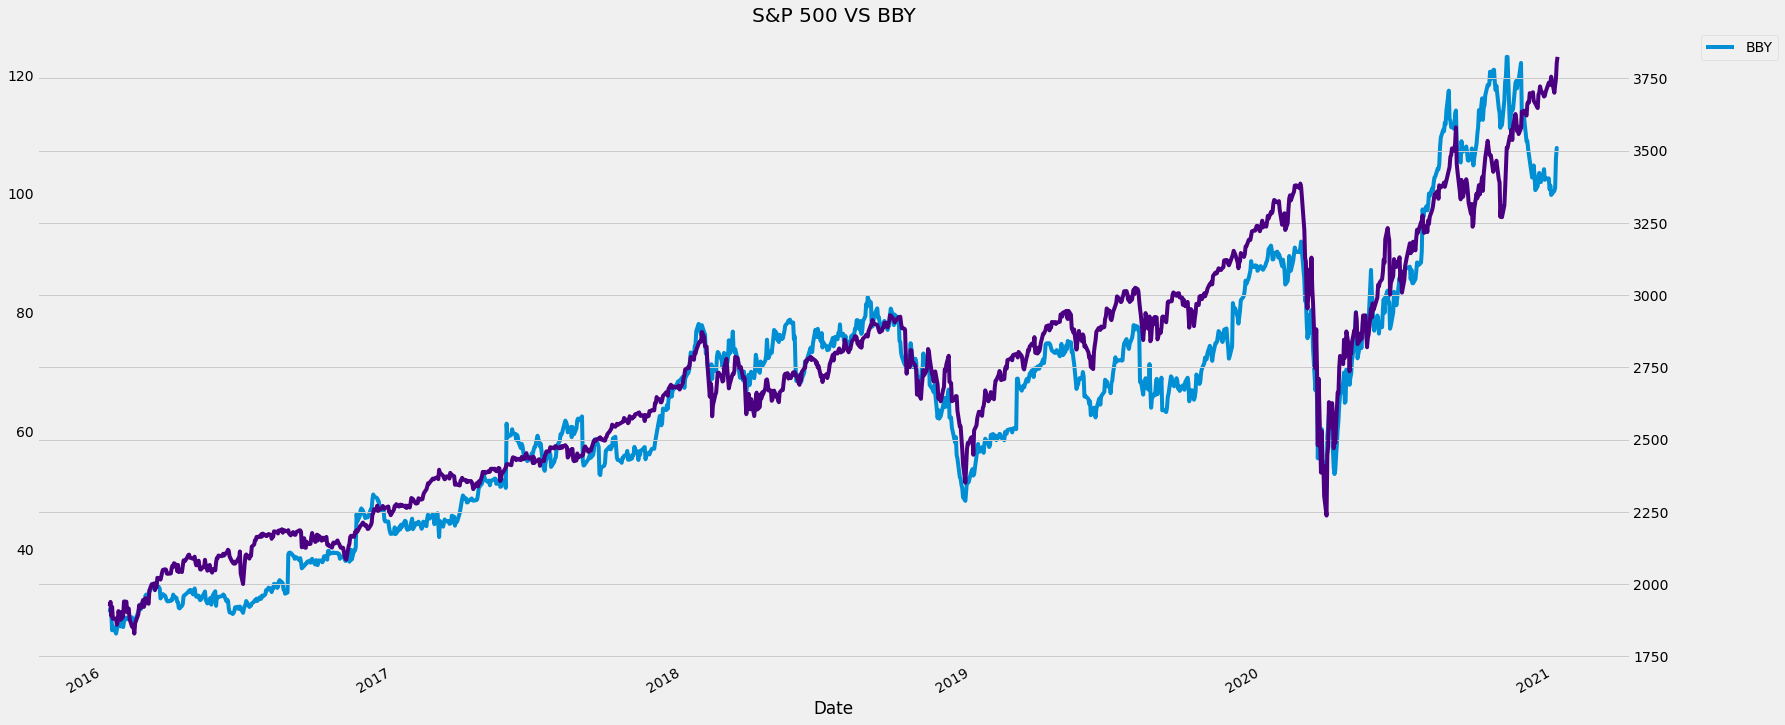

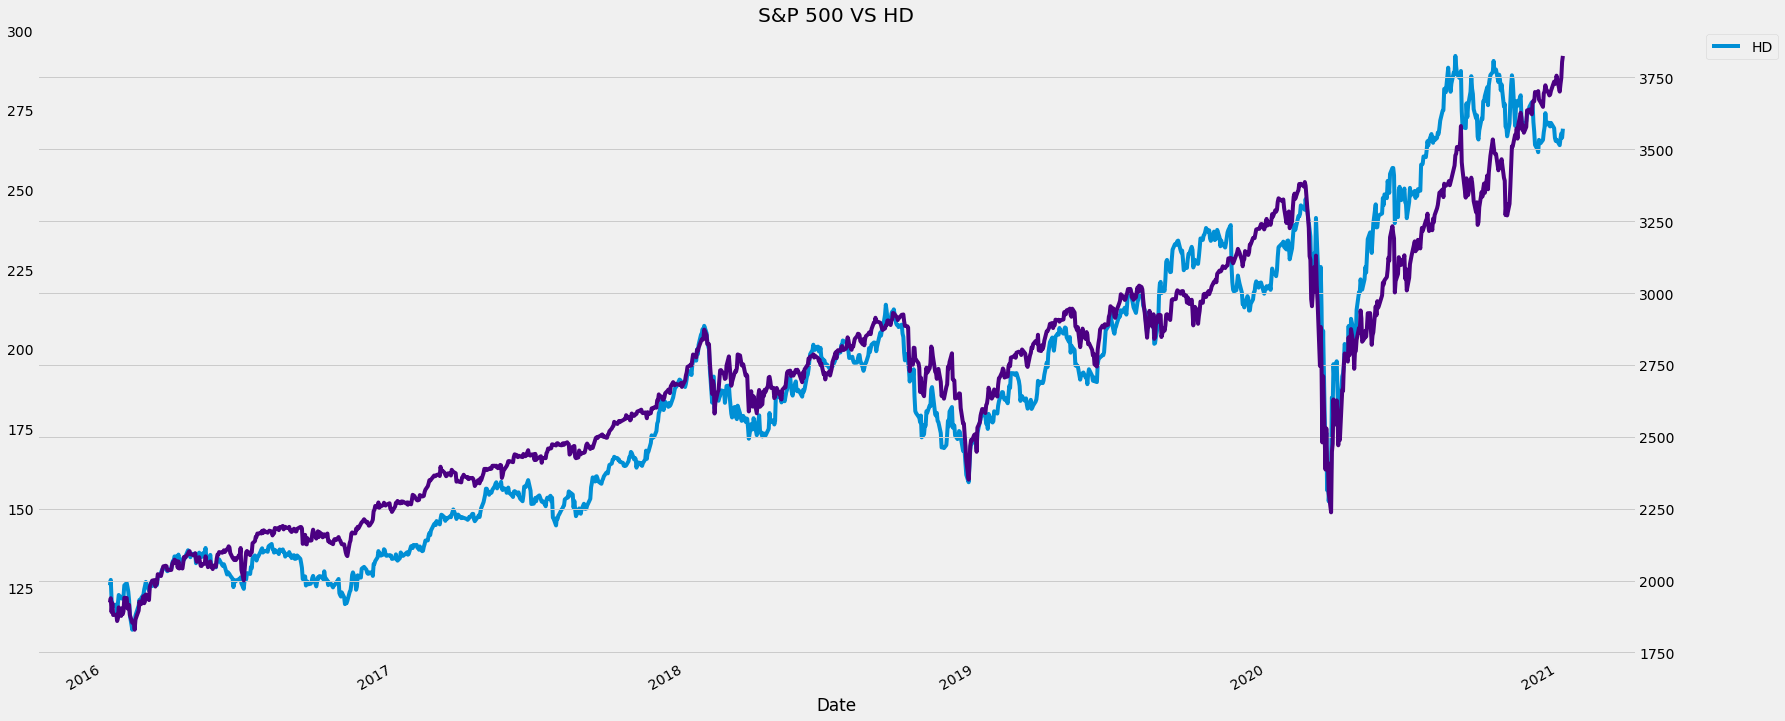

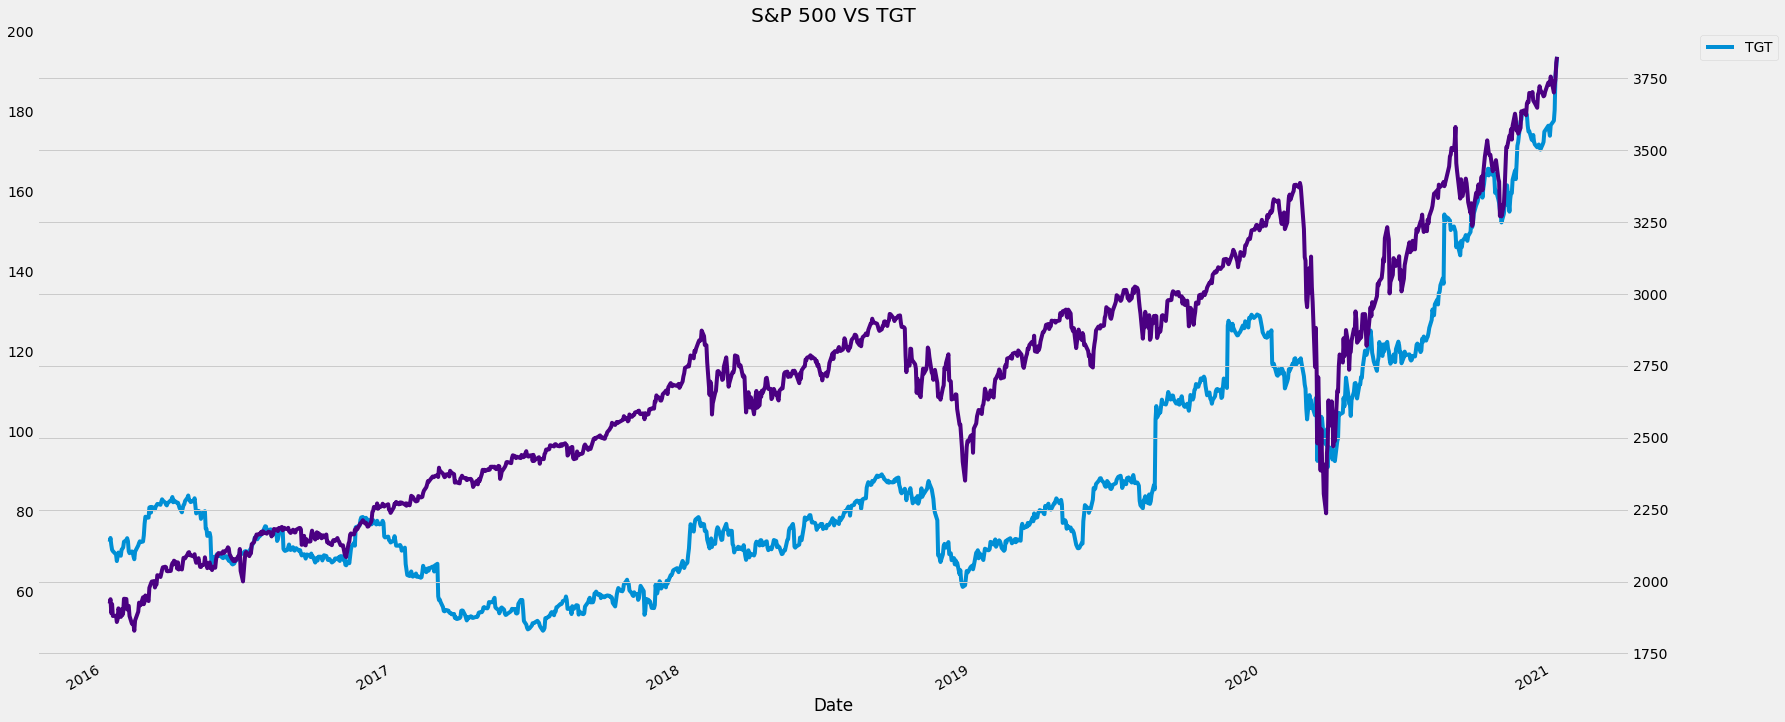

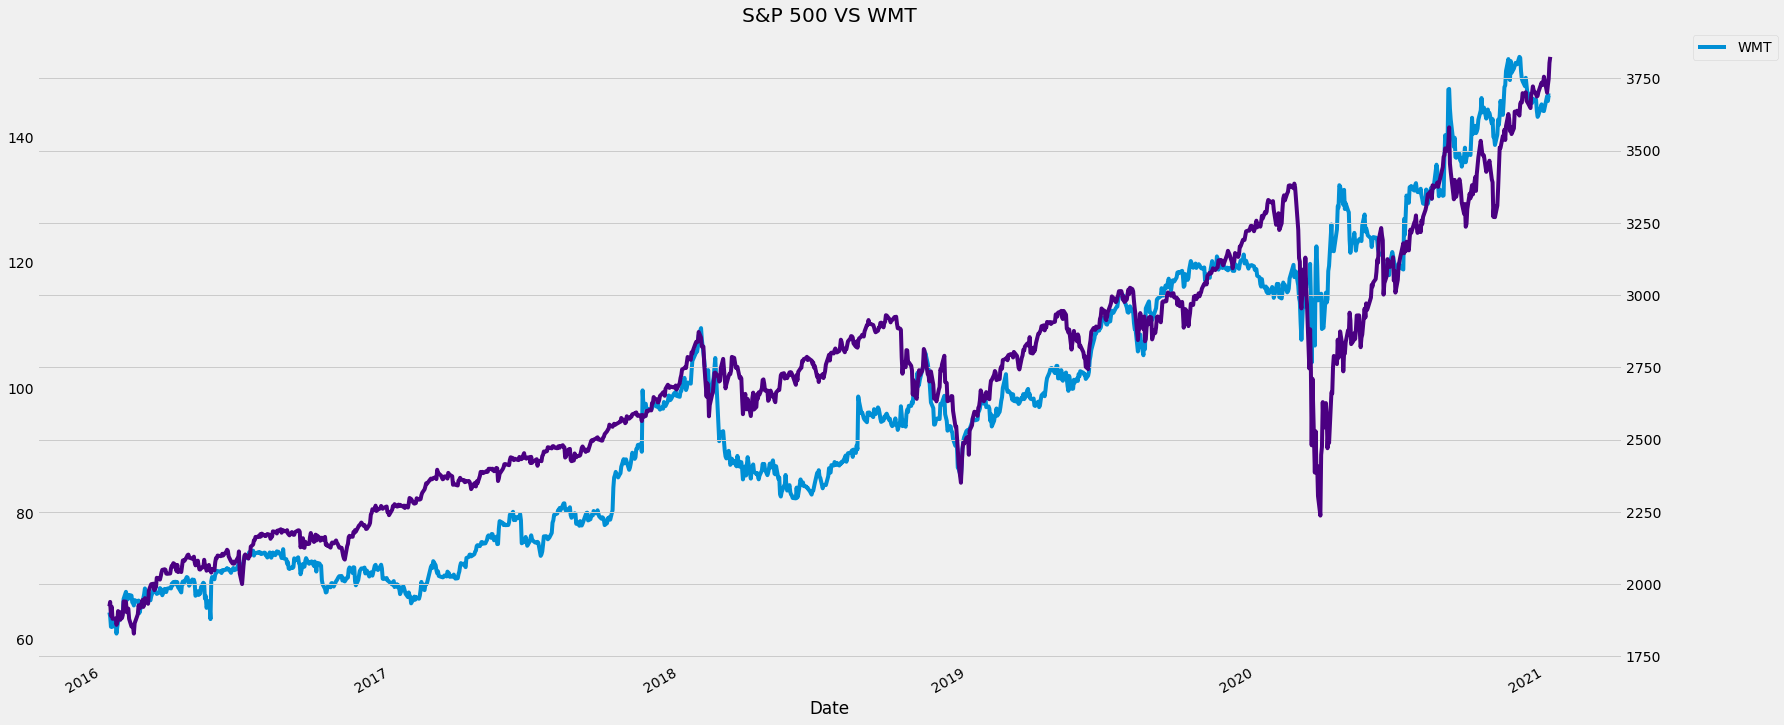

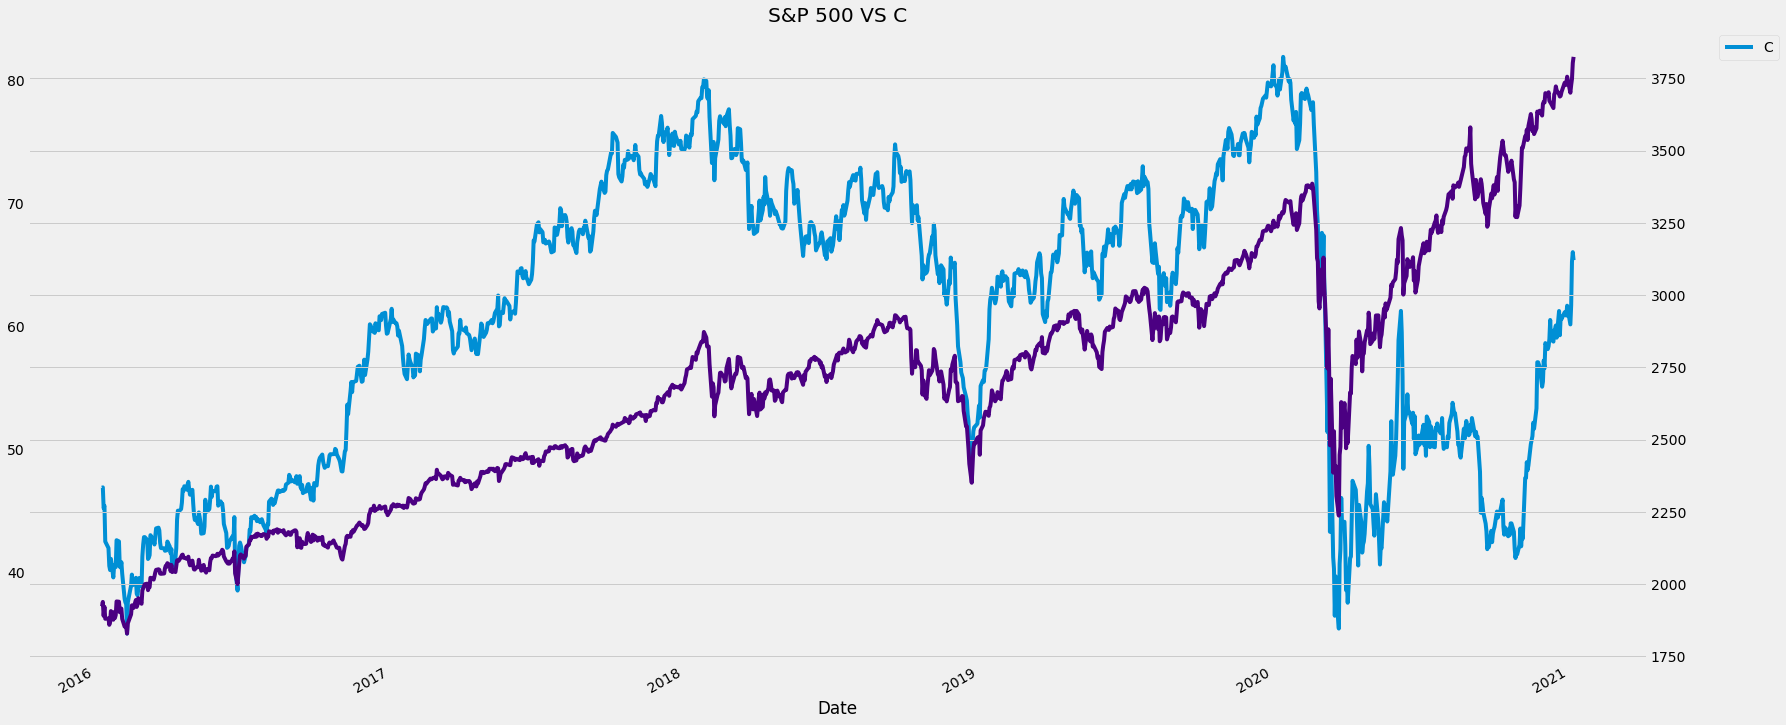

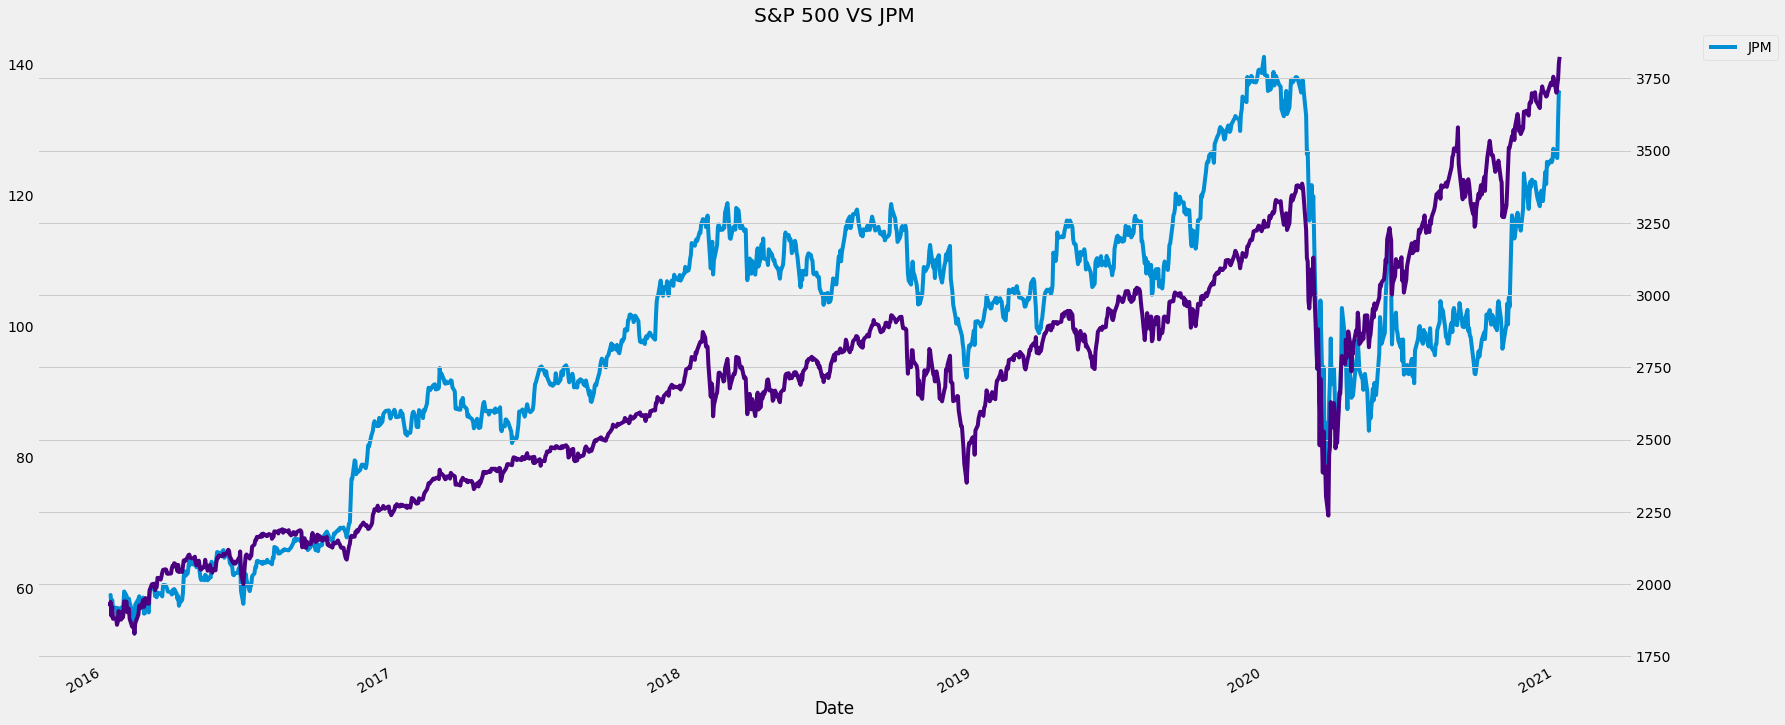

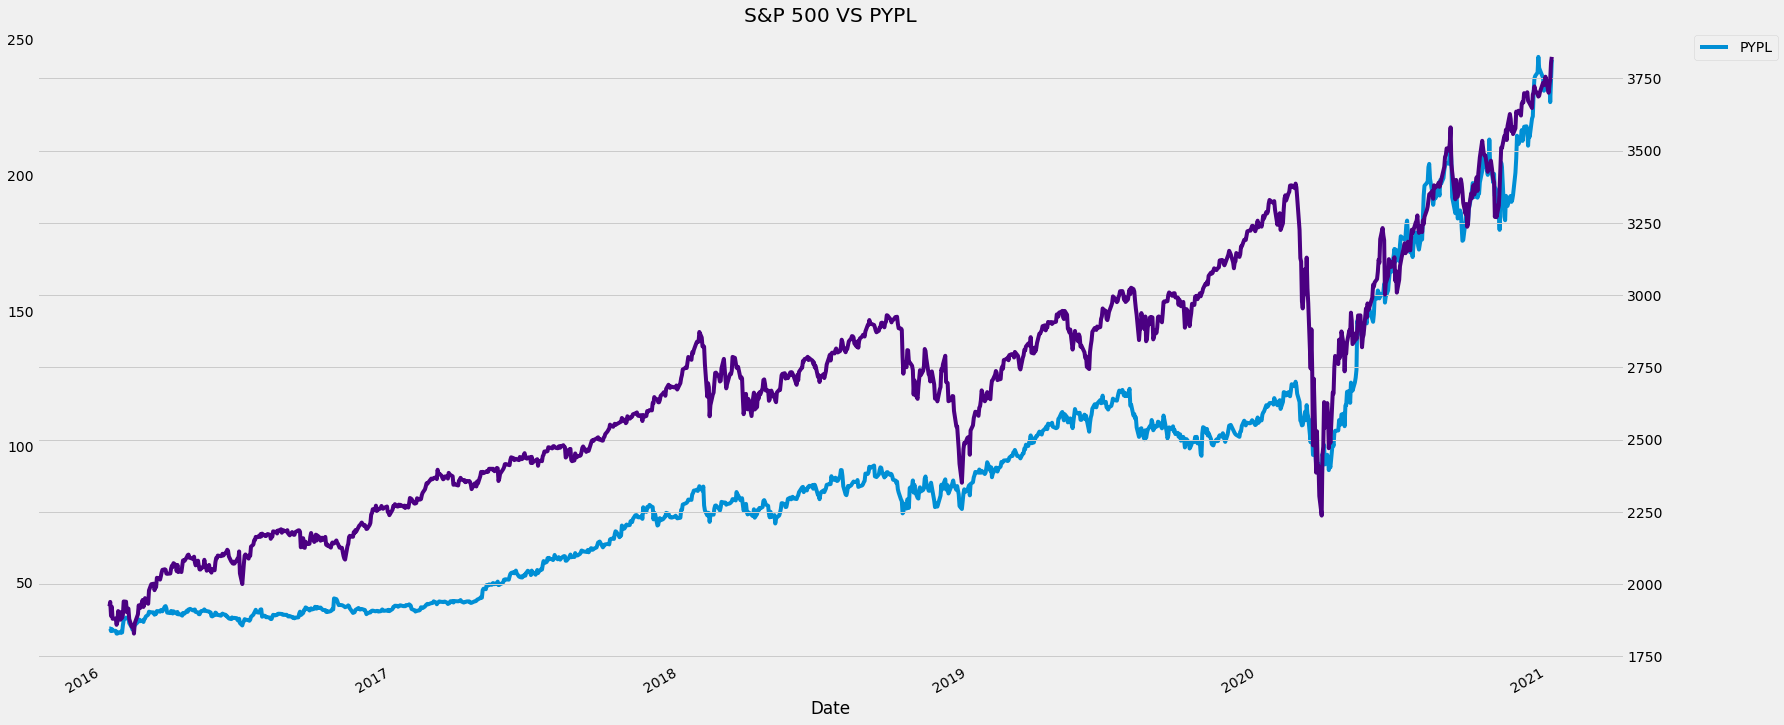

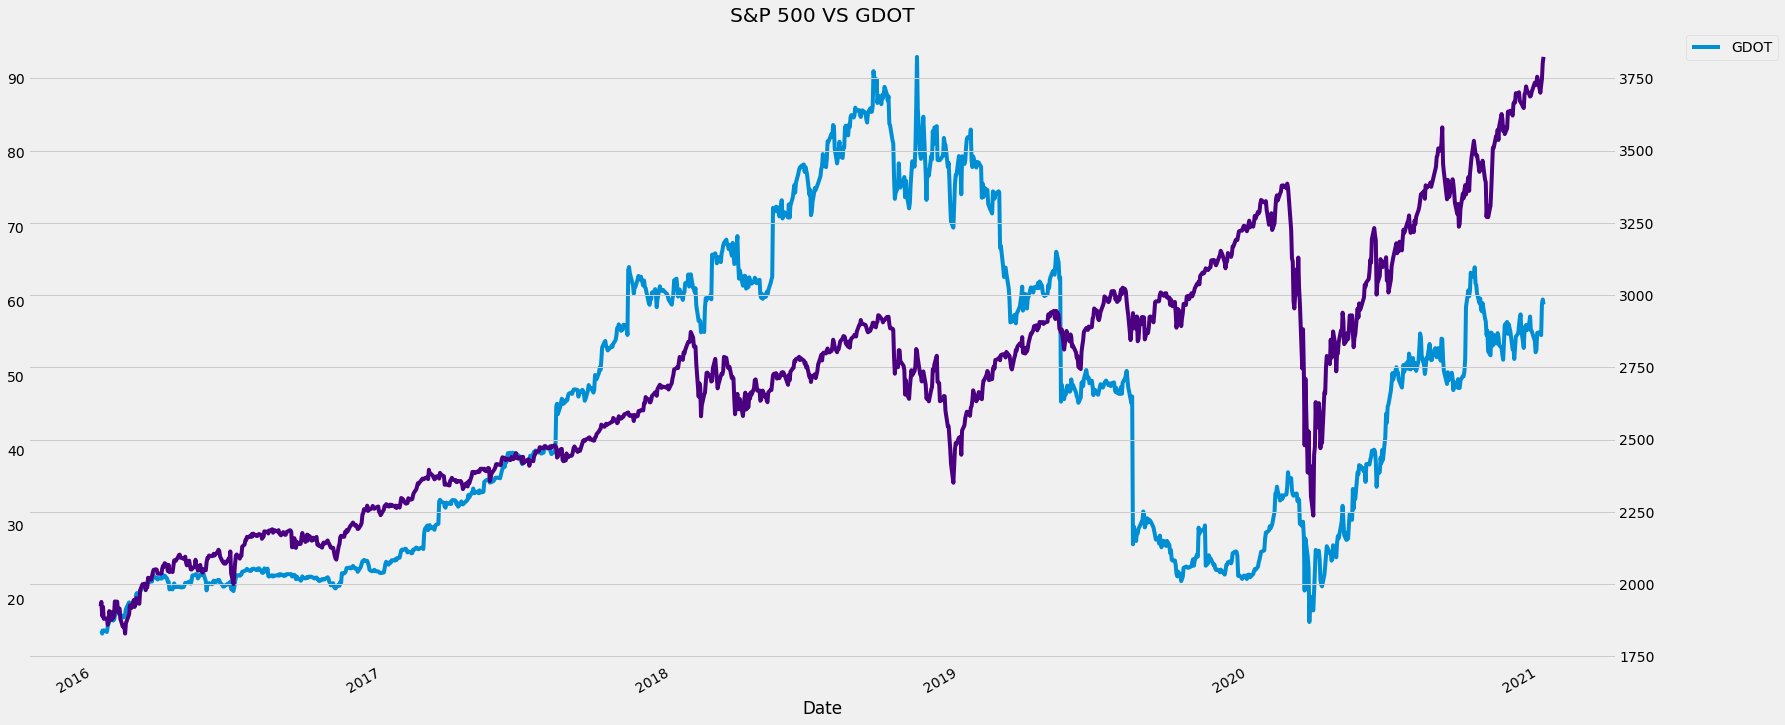

In [42]:
for i in listOfVariables:
    benchmark = stock_close['SP500']
    ax = stock_close[i].plot()
    ax2 = ax.twinx()
    ax2.plot(benchmark, 'indigo')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.grid(False)
    plt.tight_layout()
    plt.title("S&P 500 VS " + i)
    plt.show()
    


# Moving Averages

In [43]:
close_px = SHOP['Close']
SHOP['50_MA']=close_px.rolling(window=50).mean()
SHOP.head()

Date      Close  Volume  50_MA
0  2016-01-11  23.870001  294500    NaN
1  2016-01-12  23.740000  369800    NaN
2  2016-01-13  21.379999  510500    NaN
3  2016-01-14  20.639999  813700    NaN
4  2016-01-15  19.889999  921200    NaN

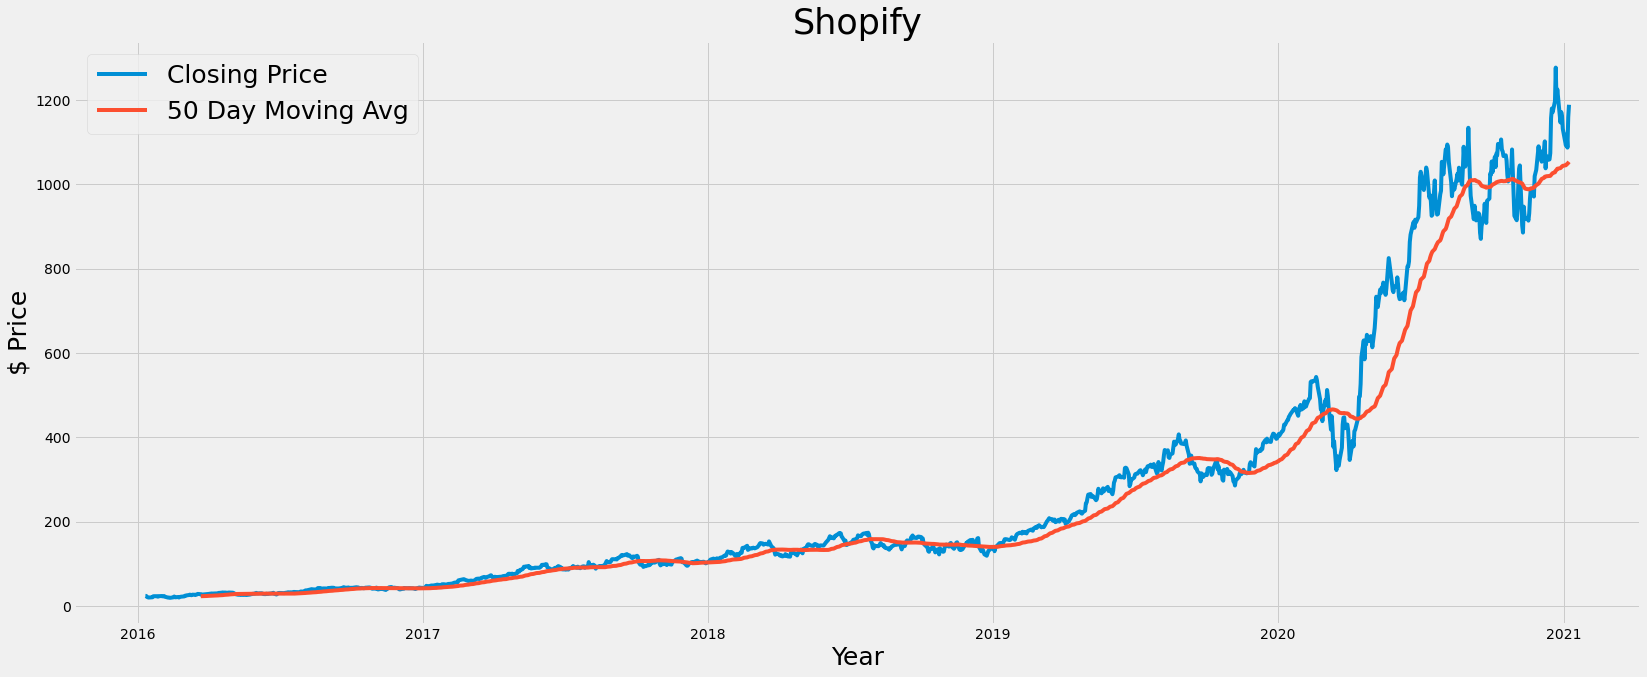

In [44]:
SHOP['Date']=pd.to_datetime(HD['Date'])
SHOP.set_index('Date',inplace=True)
plt.plot('Close', data=SHOP, label='Closing Price')
plt.plot('50_MA', data=SHOP, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Shopify', fontsize=35)
plt.savefig('shop_50.jpg')
plt.show()

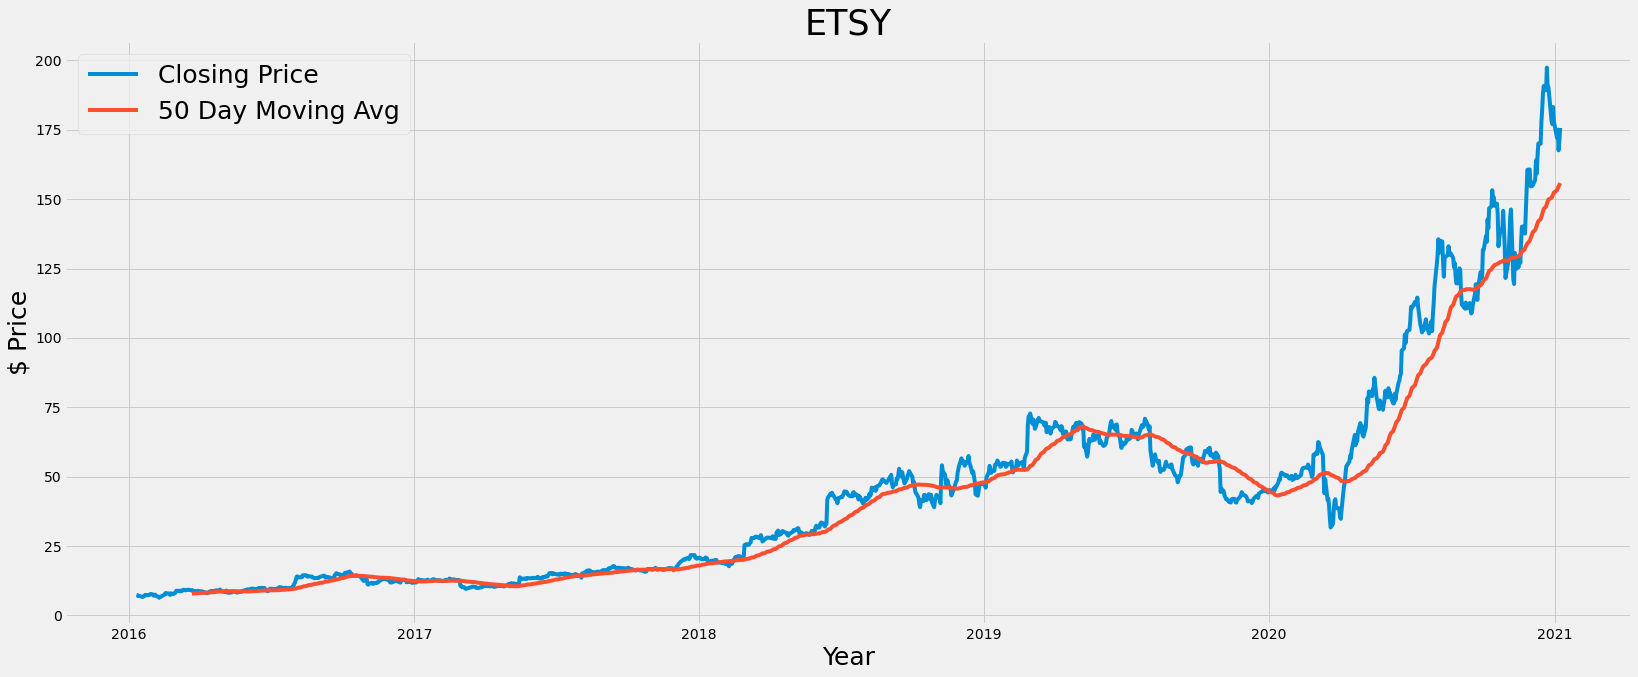

In [45]:
close_px = ETSY['Close']
ETSY['50_MA']=close_px.rolling(window=50).mean()
ETSY['Date']=pd.to_datetime(HD['Date'])
ETSY.set_index('Date',inplace=True)
plt.plot('Close', data=ETSY, label='Closing Price')
plt.plot('50_MA', data=ETSY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('ETSY', fontsize=35)
plt.savefig('etsy_50.jpg')
plt.show()

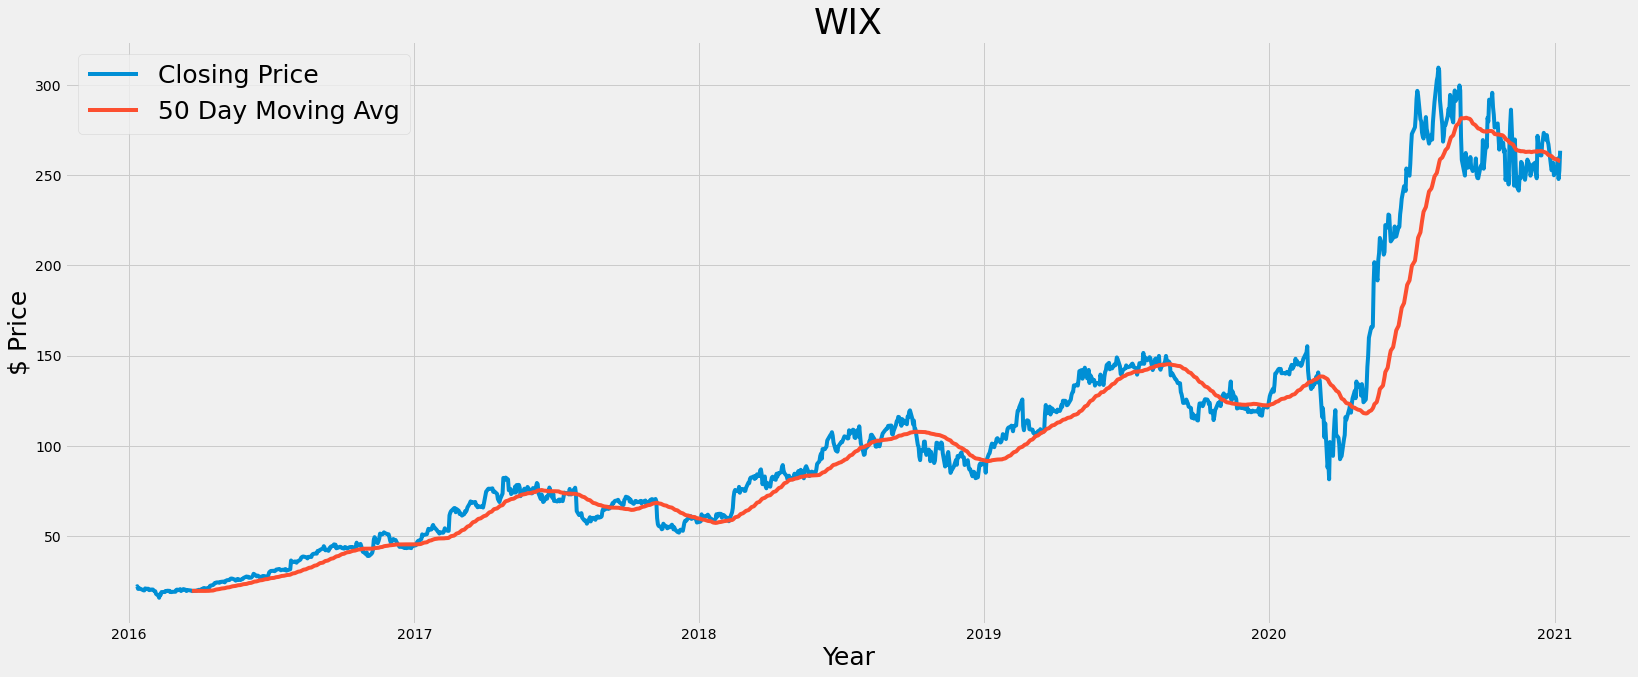

In [46]:
close_px = WIX['Close']
WIX['50_MA']=close_px.rolling(window=50).mean()
WIX['Date']=pd.to_datetime(HD['Date'])
WIX.set_index('Date',inplace=True)
plt.plot('Close', data=WIX, label='Closing Price')
plt.plot('50_MA', data=WIX, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('WIX', fontsize=35)
plt.savefig('wix_50.jpg')
plt.show()

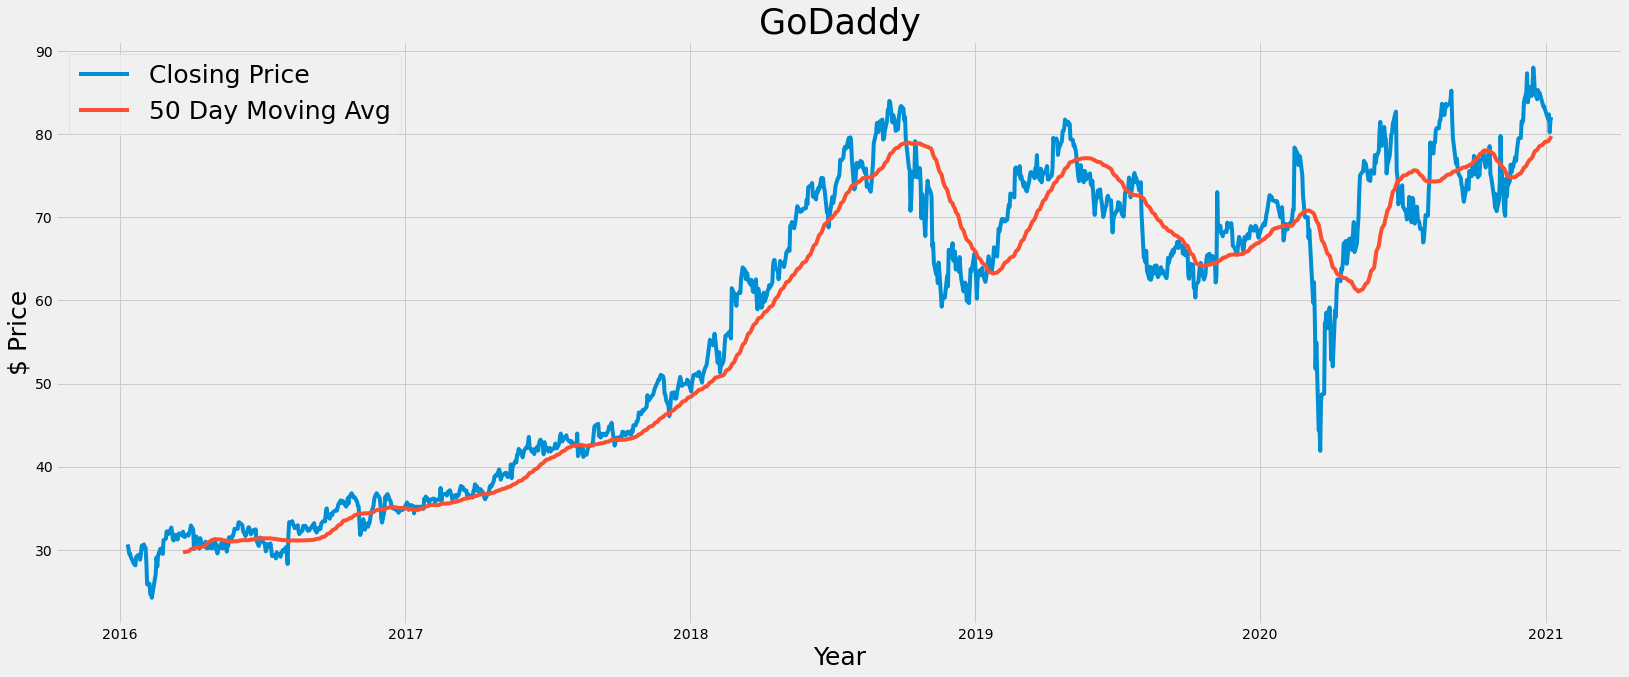

In [47]:
close_px = GDDY['Close']
GDDY['50_MA']=close_px.rolling(window=50).mean()
GDDY['Date']=pd.to_datetime(HD['Date'])
GDDY.set_index('Date',inplace=True)
plt.plot('Close', data=GDDY, label='Closing Price')
plt.plot('50_MA', data=GDDY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('GoDaddy', fontsize=35)
plt.savefig('gd_50.jpg')
plt.show()

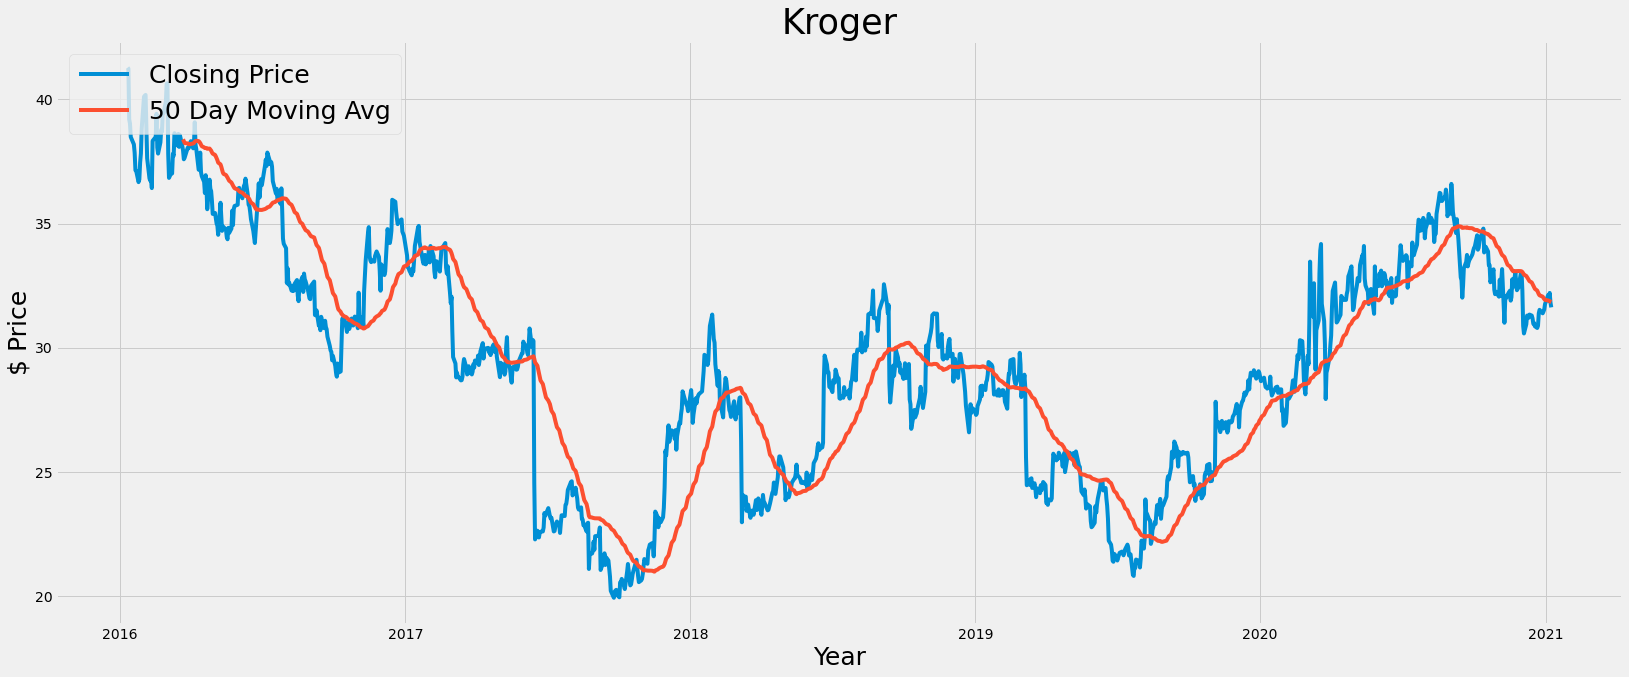

In [48]:
close_px = KR['Close']
KR['50_MA']=close_px.rolling(window=50).mean()
KR['Date']=pd.to_datetime(HD['Date'])
KR.set_index('Date',inplace=True)
plt.plot('Close', data=KR, label='Closing Price')
plt.plot('50_MA', data=KR, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Kroger', fontsize=35)
plt.savefig('kr_50.jpg')
plt.show()

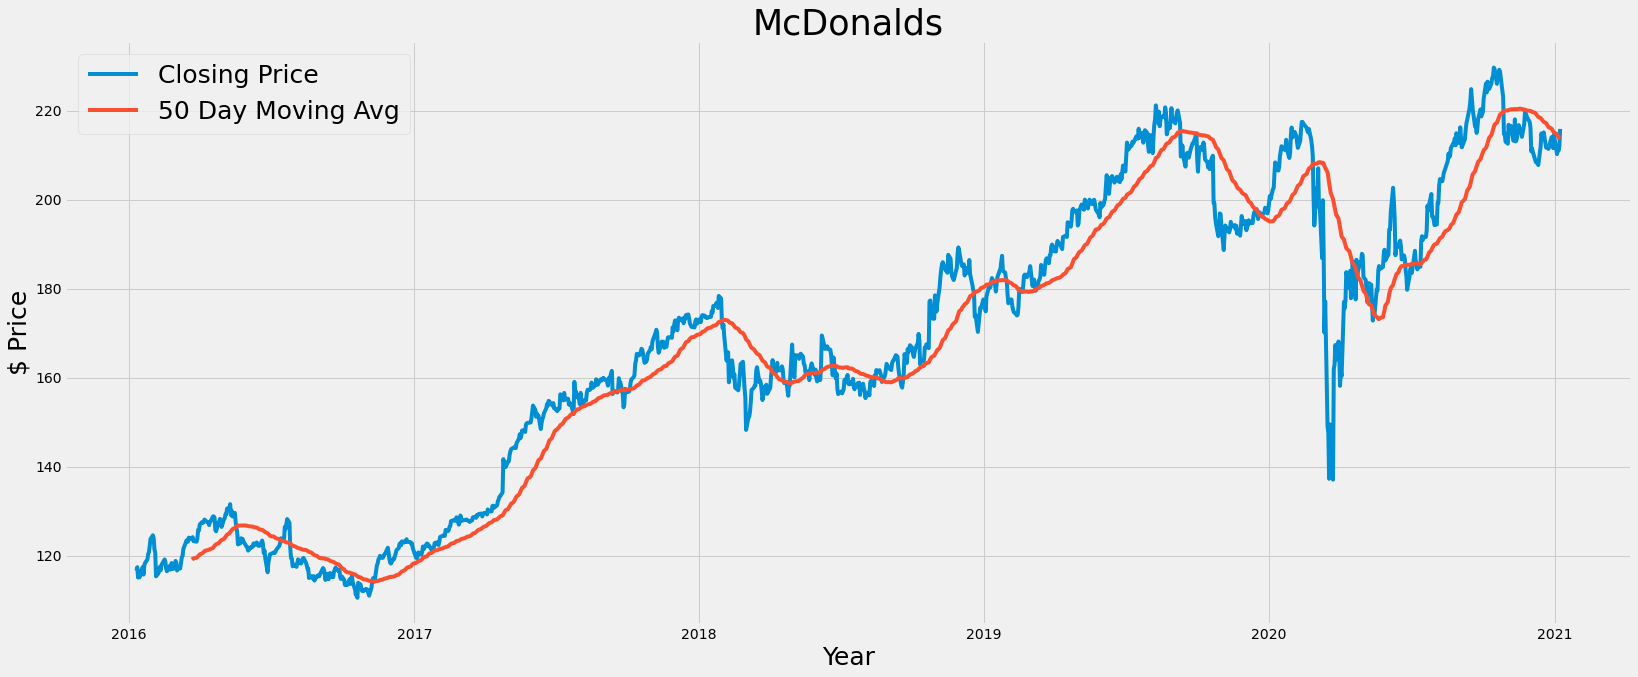

In [49]:
close_px = MCD['Close']
MCD['50_MA']=close_px.rolling(window=50).mean()
MCD['Date']=pd.to_datetime(HD['Date'])
MCD.set_index('Date',inplace=True)
plt.plot('Close', data=MCD, label='Closing Price')
plt.plot('50_MA', data=MCD, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('McDonalds', fontsize=35)
plt.savefig('mcd_50.jpg')
plt.show()

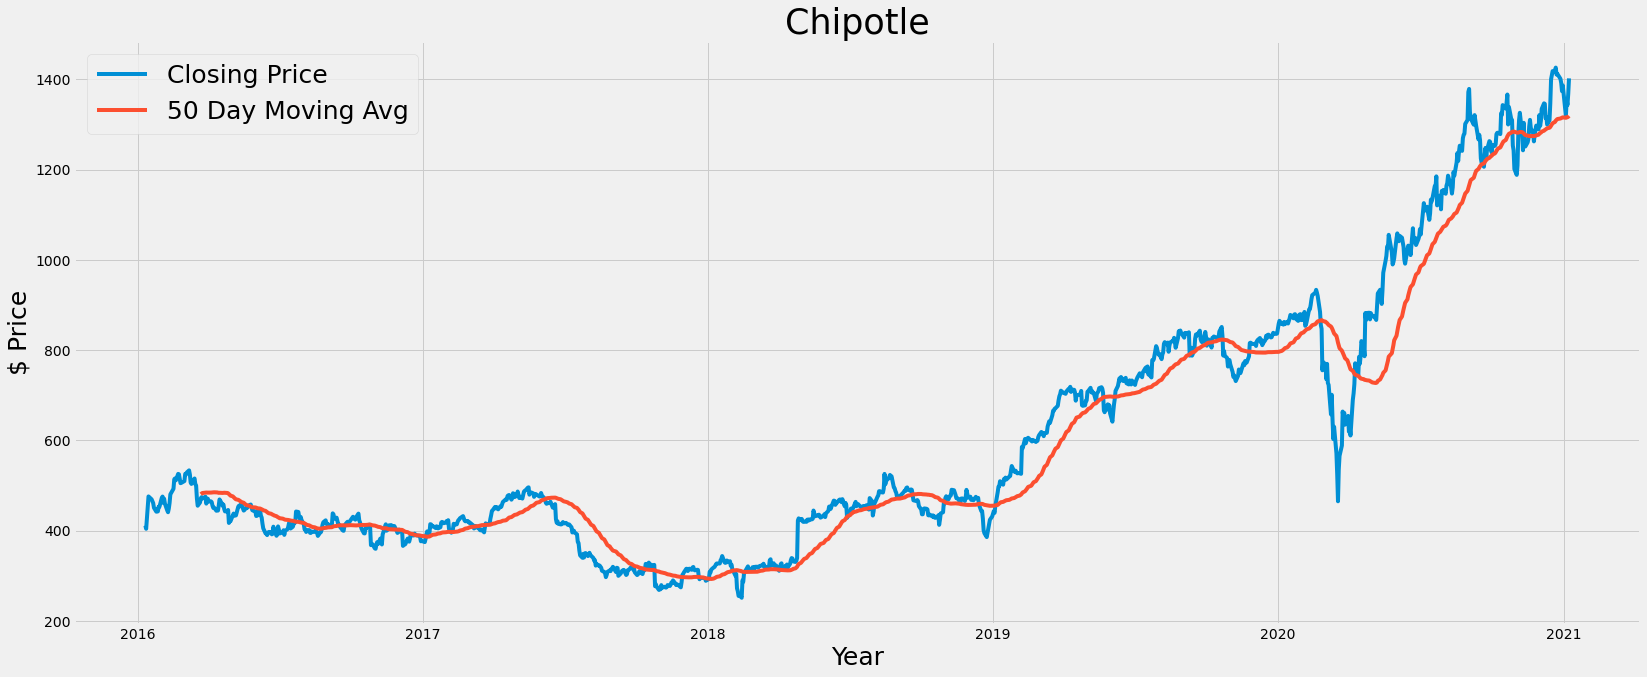

In [50]:
close_px = CMG['Close']
CMG['50_MA']=close_px.rolling(window=50).mean()
CMG['Date']=pd.to_datetime(HD['Date'])
CMG.set_index('Date',inplace=True)
plt.plot('Close', data=CMG, label='Closing Price')
plt.plot('50_MA', data=CMG, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Chipotle', fontsize=35)
plt.savefig('cmg_50.jpg')
plt.show()

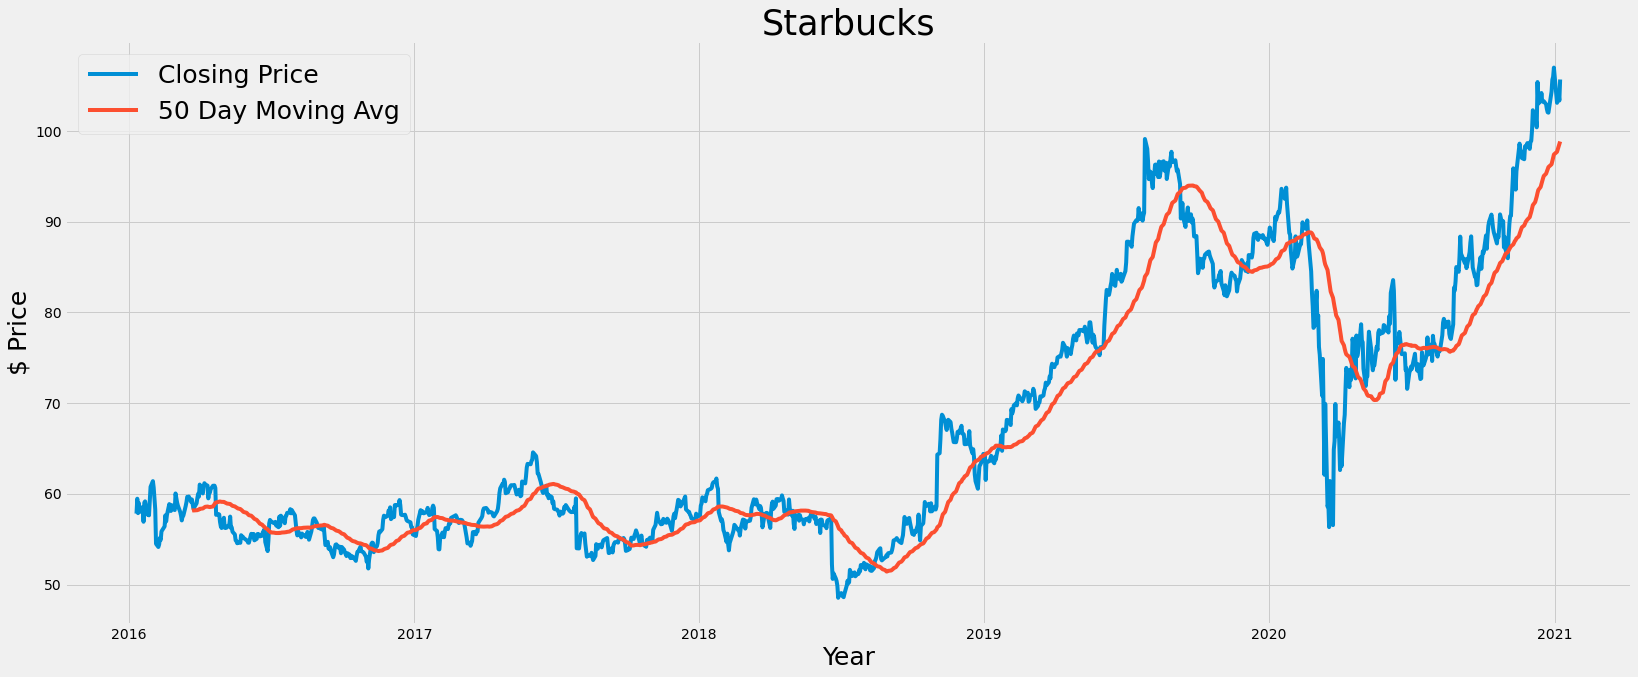

In [51]:
close_px = SBUX['Close']
SBUX['50_MA']=close_px.rolling(window=50).mean()
SBUX['Date']=pd.to_datetime(HD['Date'])
SBUX.set_index('Date',inplace=True)
plt.plot('Close', data=SBUX, label='Closing Price')
plt.plot('50_MA', data=SBUX, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Starbucks', fontsize=35)
plt.savefig('sbux_50.jpg')
plt.show()

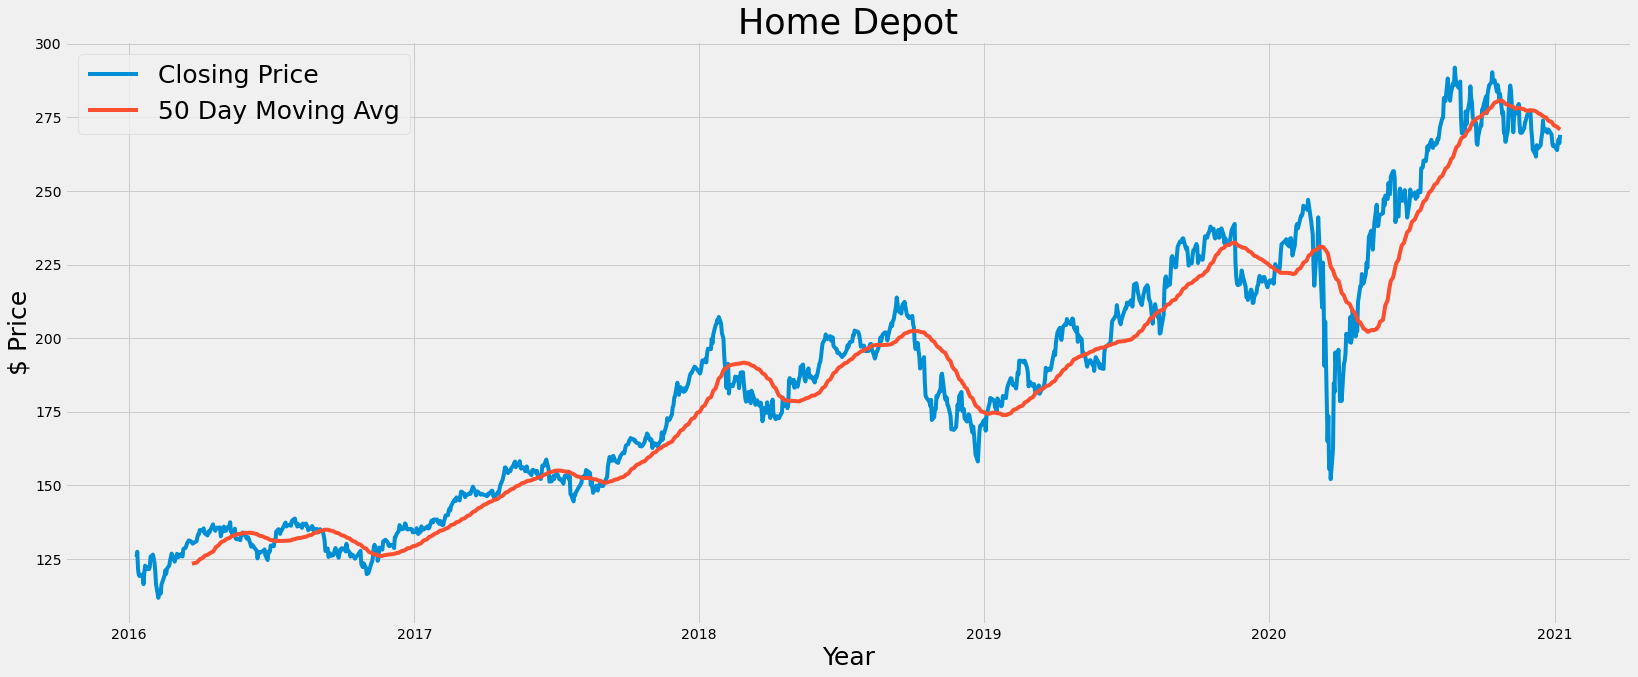

In [52]:
close_px = HD['Close']
HD['50_MA']=close_px.rolling(window=50).mean()
HD['Date']=pd.to_datetime(HD['Date'])
HD.set_index('Date',inplace=True)
plt.plot('Close', data=HD, label='Closing Price')
plt.plot('50_MA', data=HD, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Home Depot', fontsize=35)
plt.savefig('hd_50.jpg')
plt.show()

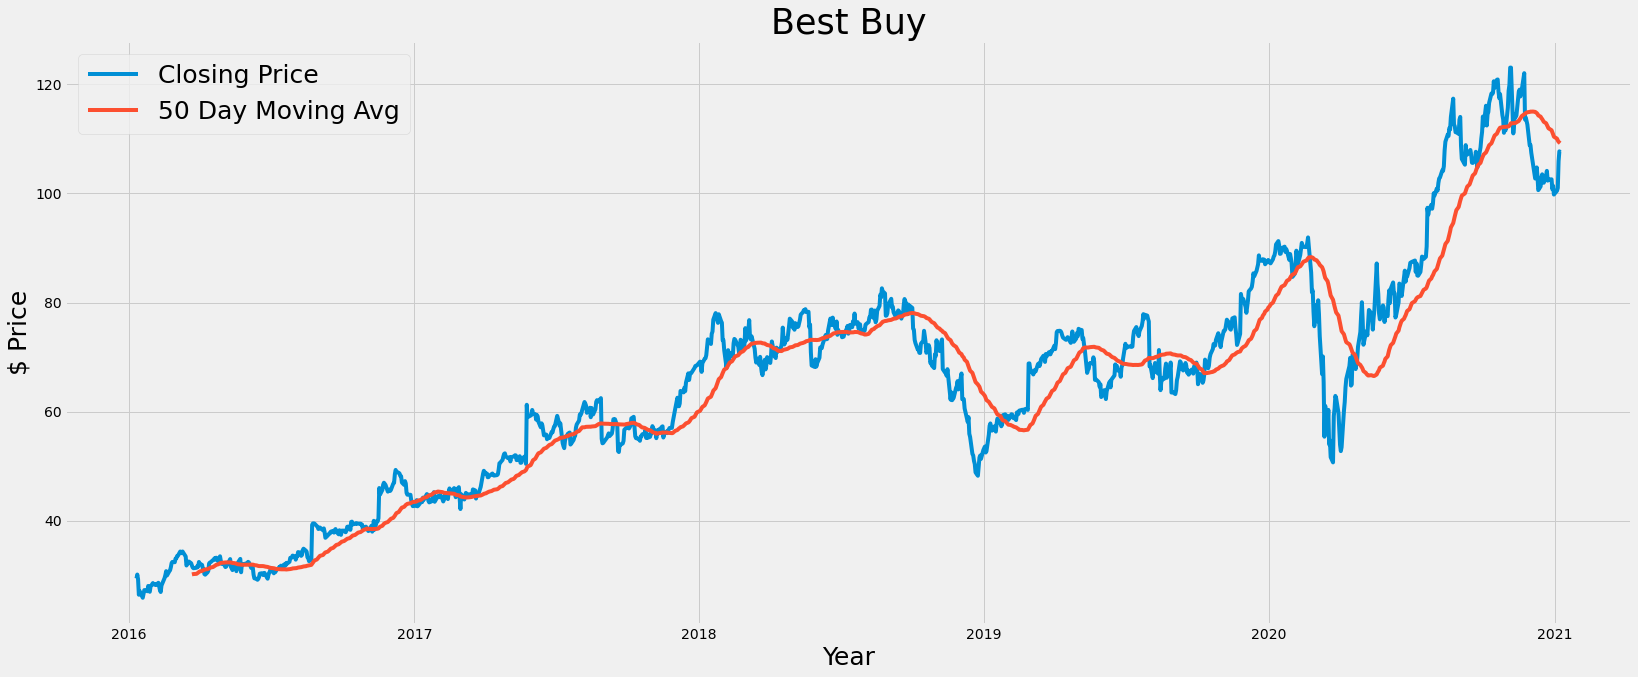

In [53]:
close_px = BBY['Close']
BBY['50_MA']=close_px.rolling(window=50).mean()
BBY['Date']=pd.to_datetime(BBY['Date'])
BBY.set_index('Date',inplace=True)
plt.plot('Close', data=BBY, label='Closing Price')
plt.plot('50_MA', data=BBY, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Best Buy', fontsize=35)
plt.savefig('bby_50.jpg')
plt.show()

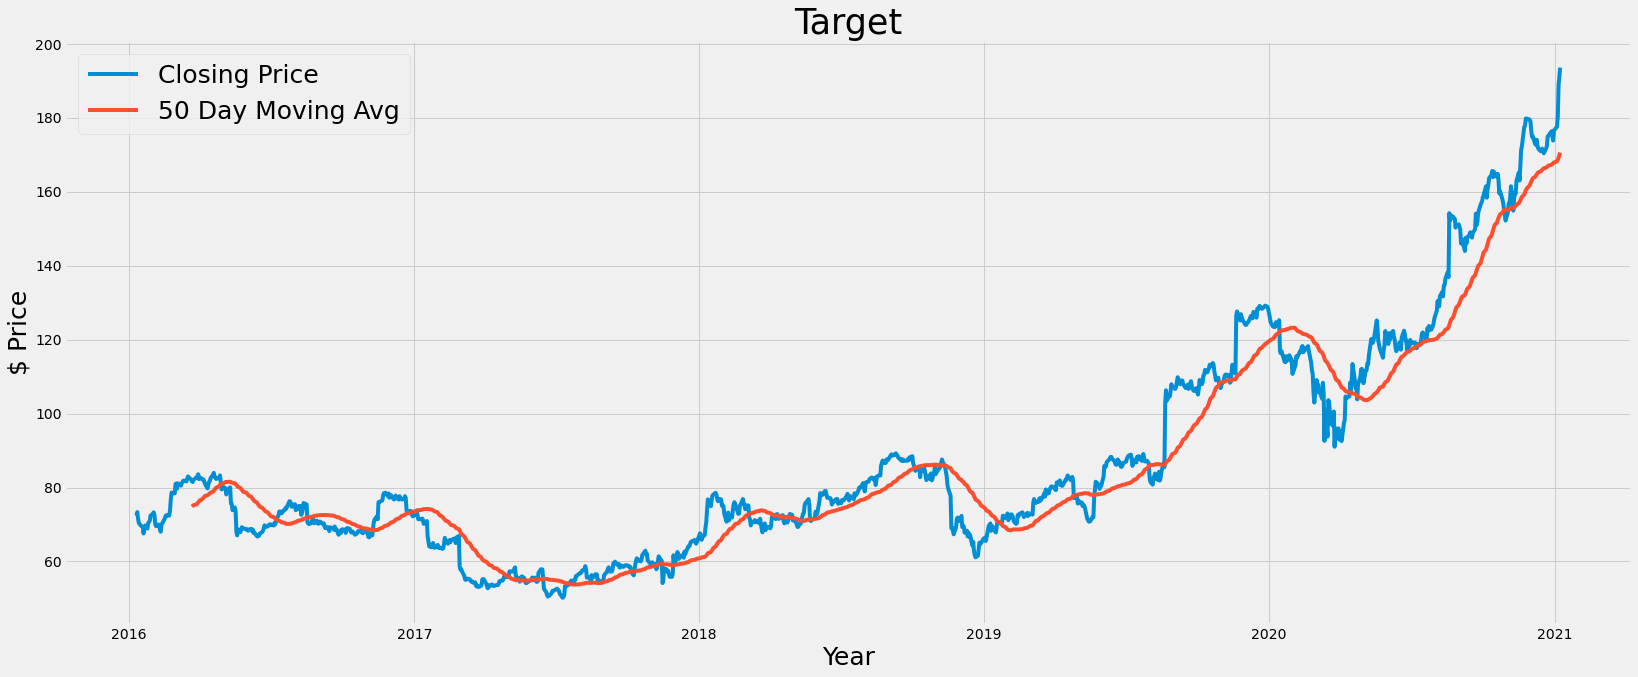

In [54]:
close_px = TGT['Close']
TGT['50_MA']=close_px.rolling(window=50).mean()
TGT['Date']=pd.to_datetime(TGT['Date'])
TGT.set_index('Date',inplace=True)
plt.plot('Close', data=TGT, label='Closing Price')
plt.plot('50_MA', data=TGT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Target', fontsize=35)
plt.savefig('tgt_50.jpg')
plt.show()

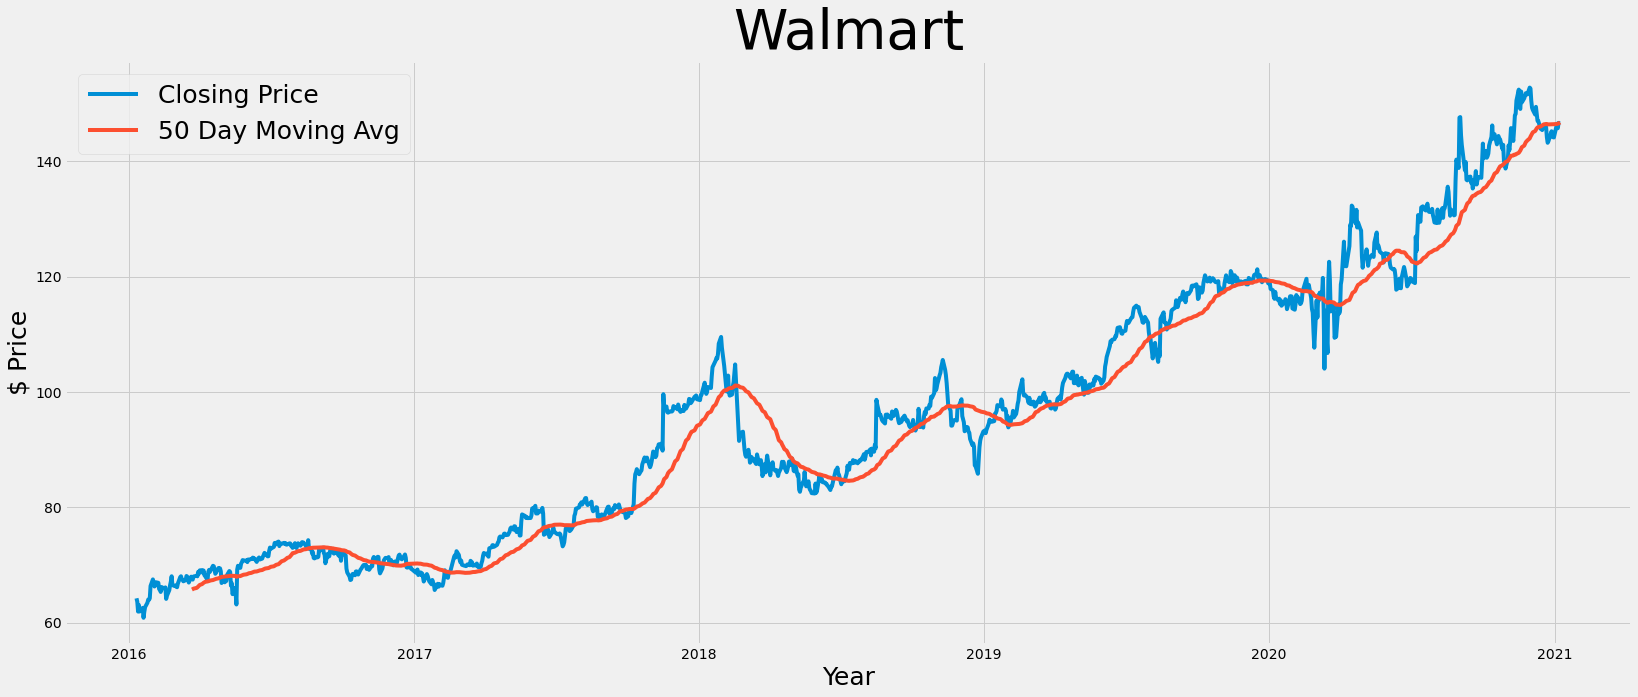

In [55]:
close_px = WMT['Close']
WMT['50_MA']=close_px.rolling(window=50).mean()
WMT['Date']=pd.to_datetime(WMT['Date'])
WMT.set_index('Date',inplace=True)
plt.plot('Close', data=WMT, label='Closing Price')
plt.plot('50_MA', data=WMT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Walmart', fontsize=55)
plt.savefig('wm_50.jpg')
plt.show()

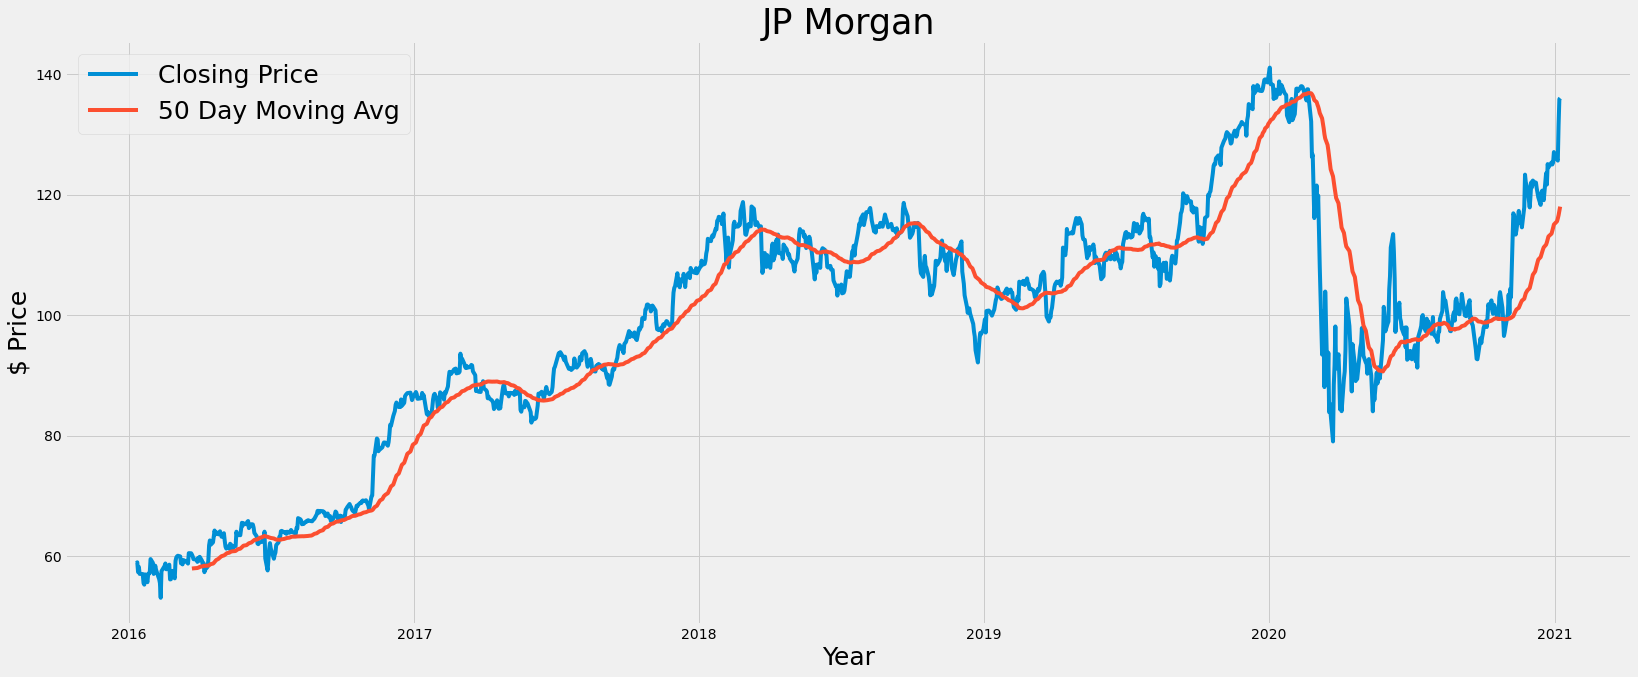

In [56]:
close_px = JPM['Close']
JPM['50_MA']=close_px.rolling(window=50).mean()
JPM['Date']=pd.to_datetime(JPM['Date'])
JPM.set_index('Date',inplace=True)
plt.plot('Close', data=JPM, label='Closing Price')
plt.plot('50_MA', data=JPM, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('JP Morgan', fontsize=35)
plt.savefig('jpm_50.jpg')
plt.show()

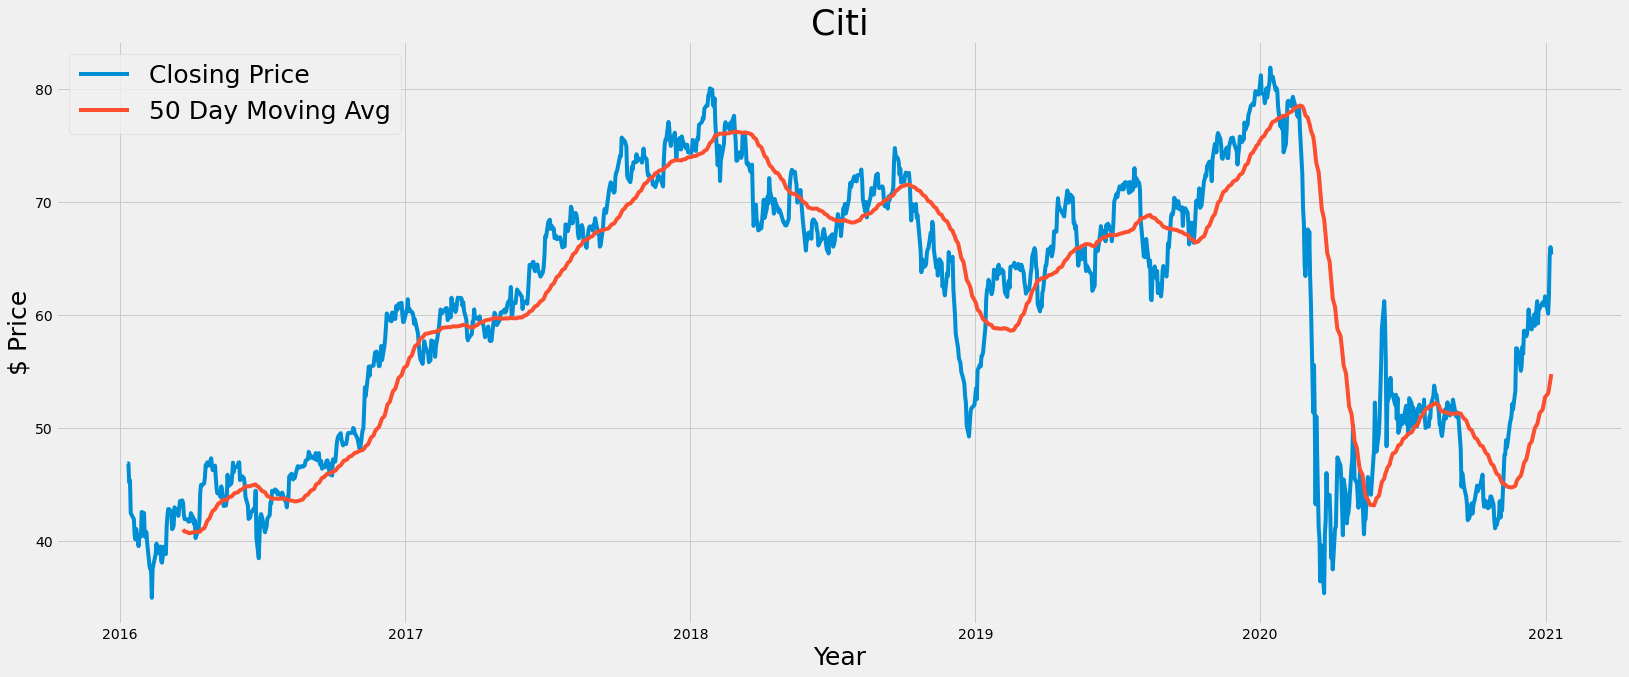

In [57]:
close_px = C['Close']
C['50_MA']=close_px.rolling(window=50).mean()
C['Date']=pd.to_datetime(C['Date'])
C.set_index('Date',inplace=True)
plt.plot('Close', data=C, label='Closing Price')
plt.plot('50_MA', data=C, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Citi', fontsize=35)
plt.savefig('c_50.jpg')
plt.show()

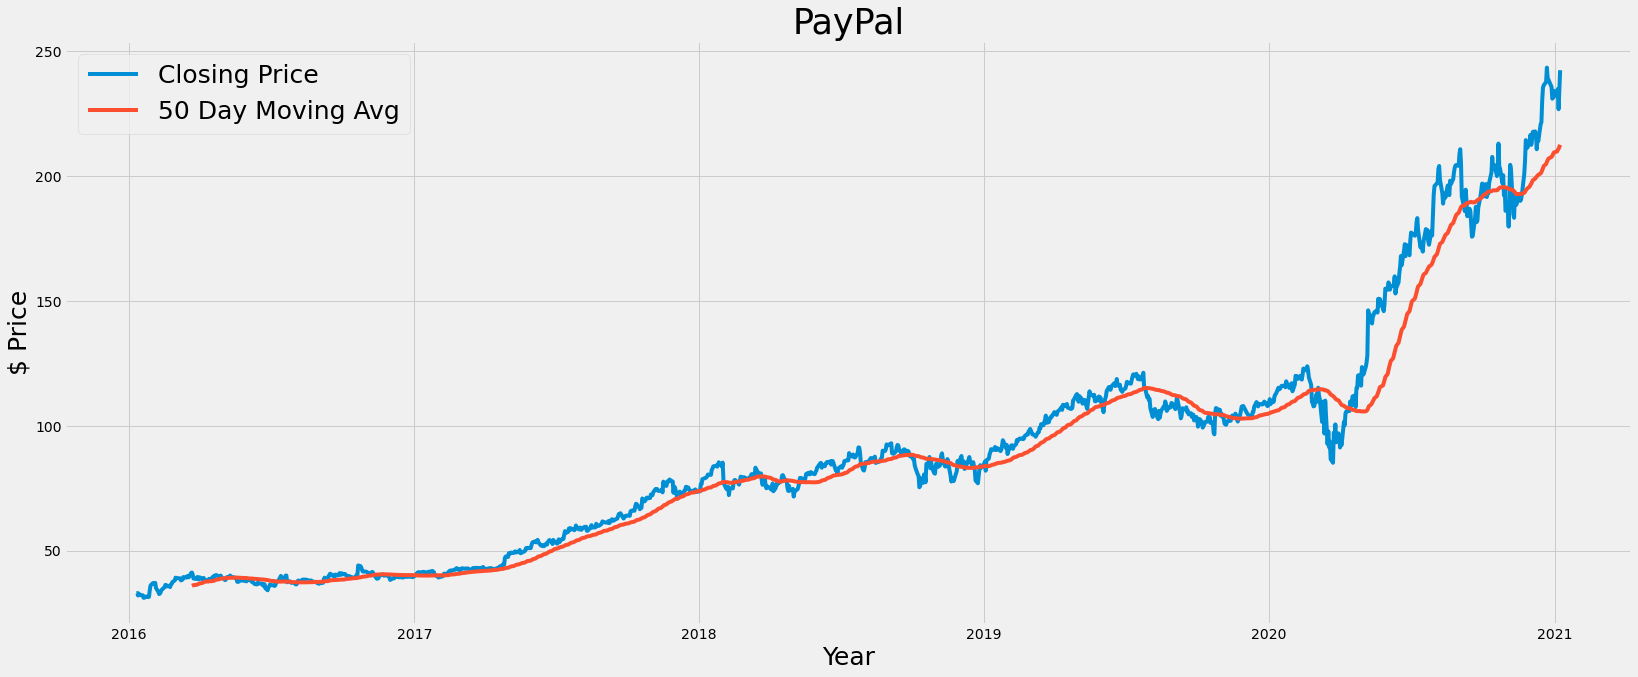

In [58]:
close_px = PYPL['Close']
PYPL['50_MA']=close_px.rolling(window=50).mean()
PYPL['Date']=pd.to_datetime(PYPL['Date'])
PYPL.set_index('Date',inplace=True)
plt.plot('Close', data=PYPL, label='Closing Price')
plt.plot('50_MA', data=PYPL, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('PayPal', fontsize=35)
plt.savefig('pypl_50.jpg')
plt.show()

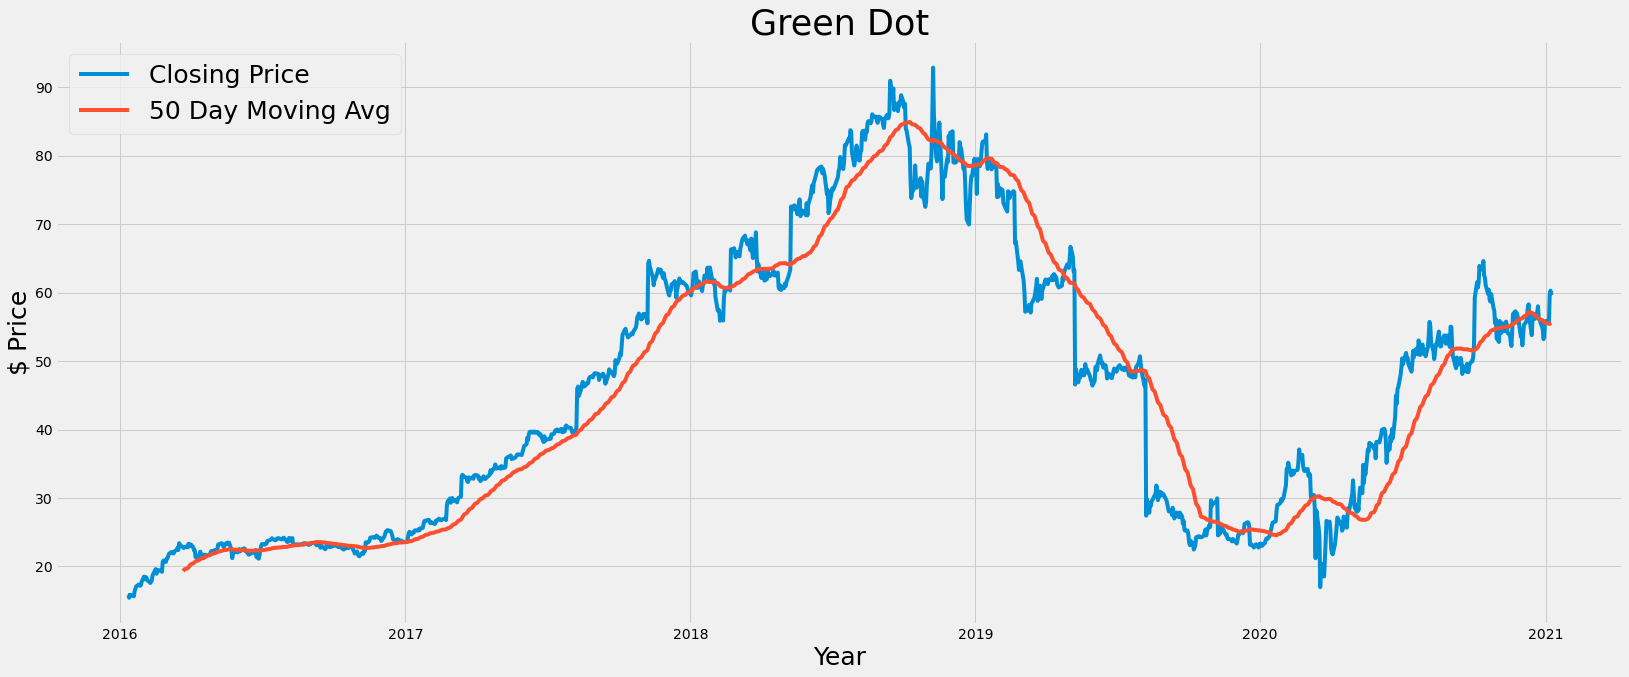

In [59]:
close_px = GDOT['Close']
GDOT['50_MA']=close_px.rolling(window=50).mean()
GDOT['Date']=pd.to_datetime(GDOT['Date'])
GDOT.set_index('Date',inplace=True)
plt.plot('Close', data=GDOT, label='Closing Price')
plt.plot('50_MA', data=GDOT, label='50 Day Moving Avg')
plt.legend(loc='upper left', fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("$ Price", fontsize=25)
plt.title('Green Dot', fontsize=35)
plt.savefig('gd_50.jpg')
plt.show()

In [60]:
# e_com2018.to_csv('e_com2018.csv')

SHOP.to_excel('shop1.xlsx')
ETSY.to_excel('etsy1.xlsx')
WIX.to_excel('wix1.xlsx')
GDDY.to_excel('gddy1.xlsx')

MCD.to_excel('mcd1.xlsx')
SBUX.to_excel('sbux1.xlsx')
KR.to_excel('kr1.xlsx')
CMG.to_excel('cmg1.xlsx')

TGT.to_excel('tgt1.xlsx')
WMT.to_excel('wmt1.xlsx')
BBY.to_excel('bby1.xlsx')
HD.to_excel('hd1.xlsx')

JPM.to_excel('jpm1.xlsx')
GDOT.to_excel('gdot1.xlsx')
PYPL.to_excel('pypl1.xlsx')
C.to_excel('c1.xlsx')

# Annual Growth

In [61]:
new = stock_close
full_dates = pd.date_range(start='12/14/2015', end='12/10/2020')

yoy_growth = new.reindex(full_dates)
yoy_growth

yoy_growth['SHOP'] = yoy_growth['SHOP'].fillna(method='ffill')
yoy_growth['SHOP%'] = yoy_growth['SHOP'].pct_change(365)

yoy_growth['ETSY'] = yoy_growth['ETSY'].fillna(method='ffill')
yoy_growth['ETSY%'] = yoy_growth['ETSY'].pct_change(365)

yoy_growth['WIX'] = yoy_growth['WIX'].fillna(method='ffill')
yoy_growth['WIX%'] = yoy_growth['WIX'].pct_change(365)

yoy_growth['GDDY'] = yoy_growth['GDDY'].fillna(method='ffill')
yoy_growth['GDDY%'] = yoy_growth['GDDY'].pct_change(365)

yoy_growth['KR'] = yoy_growth['KR'].fillna(method='ffill')
yoy_growth['KR%'] = yoy_growth['KR'].pct_change(365)

yoy_growth['MCD'] = yoy_growth['MCD'].fillna(method='ffill')
yoy_growth['MCD%'] = yoy_growth['MCD'].pct_change(365)

yoy_growth['CMG'] = yoy_growth['CMG'].fillna(method='ffill')
yoy_growth['CMG%'] = yoy_growth['CMG'].pct_change(365)

yoy_growth['SBUX'] = yoy_growth['SBUX'].fillna(method='ffill')
yoy_growth['SBUX%'] = yoy_growth['SBUX'].pct_change(365)

yoy_growth['BBY'] = yoy_growth['BBY'].fillna(method='ffill')
yoy_growth['BBY%'] = yoy_growth['BBY'].pct_change(365)

yoy_growth['HD'] = yoy_growth['HD'].fillna(method='ffill')
yoy_growth['HD%'] = yoy_growth['HD'].pct_change(365)

yoy_growth['WMT'] = yoy_growth['WMT'].fillna(method='ffill')
yoy_growth['WMT%'] = yoy_growth['WMT'].pct_change(365)

yoy_growth['TGT'] = yoy_growth['TGT'].fillna(method='ffill')
yoy_growth['TGT%'] = yoy_growth['TGT'].pct_change(365)

yoy_growth['C'] = yoy_growth['C'].fillna(method='ffill')
yoy_growth['C%'] = yoy_growth['C'].pct_change(365)

yoy_growth['JPM'] = yoy_growth['JPM'].fillna(method='ffill')
yoy_growth['JPM%'] = yoy_growth['JPM'].pct_change(365)

yoy_growth['PYPL'] = yoy_growth['PYPL'].fillna(method='ffill')
yoy_growth['PYPL%'] = yoy_growth['PYPL'].pct_change(365)

yoy_growth['GDOT'] = yoy_growth['GDOT'].fillna(method='ffill')
yoy_growth['GDOT%'] = yoy_growth['GDOT'].pct_change(365)

yoy_growth['SP500'] = yoy_growth['SP500'].fillna(method='ffill')
yoy_growth['SP500%'] = yoy_growth['SP500'].pct_change(365)

columns_to_keep = ['SHOP%','ETSY%','WIX%','GDDY%', 'KR%','MCD%','CMG%','SBUX%','BBY%', 'HD%', 'WMT%', 
                   'TGT%', 'C%', 'JPM%', 'PYPL%','GDOT%', 'SP500%']

yoy_growth = yoy_growth[columns_to_keep]

In [62]:
yoy_growth.index.name = 'Date'
yoy_growth
annual_growth = yoy_growth
annual_growth.head()

SHOP%  ETSY%  WIX%  GDDY%  KR%  MCD%  CMG%  SBUX%  BBY%  HD%  \
Date                                                                       
2015-12-14    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2015-12-15    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2015-12-16    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2015-12-17    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   
2015-12-18    NaN    NaN   NaN    NaN  NaN   NaN   NaN    NaN   NaN  NaN   

            WMT%  TGT%  C%  JPM%  PYPL%  GDOT%  SP500%  
Date                                                    
2015-12-14   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2015-12-15   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2015-12-16   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2015-12-17   NaN   NaN NaN   NaN    NaN    NaN     NaN  
2015-12-18   NaN   NaN NaN   NaN    NaN    NaN     NaN

In [63]:
# annual_growth.to_excel('annual_growth.xlsx', index=True)

In [69]:
# six_mo_growth = stock_close['7/8/2020':'1/8/2021']
# six_mo_growth

july_08 = stock_close.loc['7/8/2020']
july_08

jan_08 = stock_close.loc['1/8/2021']
jan_08

six_month_growth = (jan_08 - july_08)/july_08
six_month_growth

SHOP     0.168702
ETSY     0.569705
WIX     -0.097871
GDDY     0.157590
KR      -0.024368
MCD      0.161528
CMG      0.258437
SBUX     0.425276
BBY      0.233884
HD       0.079945
TGT      0.644860
WMT      0.178319
C        0.284788
JPM      0.457878
PYPL     0.335353
GDOT     0.181332
SP500    0.206546
dtype: float64

# Forecast

In [70]:
from fbprophet import Prophet

In [71]:
SHOP.head()

Close  Volume  50_MA
Date                                
2016-01-11  23.870001  294500    NaN
2016-01-12  23.740000  369800    NaN
2016-01-13  21.379999  510500    NaN
2016-01-14  20.639999  813700    NaN
2016-01-15  19.889999  921200    NaN

In [72]:
shop_df = SHOP['Close'].to_frame()
shop_df.reset_index(level=0, inplace=True)
shop_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
shop_df.head()

ds          y
0 2016-01-11  23.870001
1 2016-01-12  23.740000
2 2016-01-13  21.379999
3 2016-01-14  20.639999
4 2016-01-15  19.889999

In [73]:
shop_model = Prophet(interval_width = 0.95, daily_seasonality=True)
shop_model.fit(shop_df)

In [74]:
shop_forecast = shop_model.make_future_dataframe(periods = 183)
shop_forecast = shop_model.predict(shop_forecast)

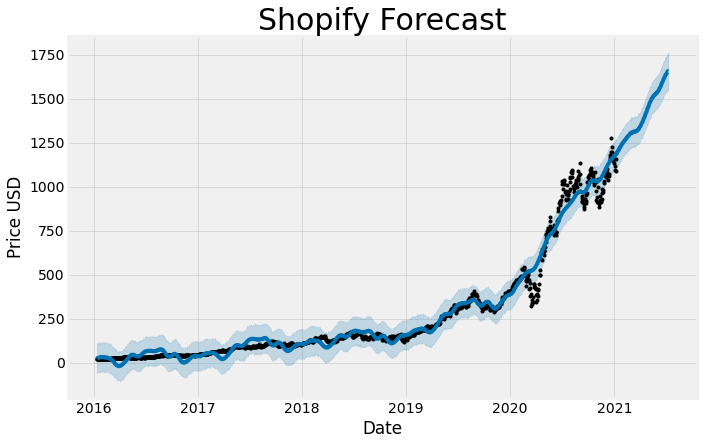

In [75]:
shop_model.plot(shop_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Shopify Forecast', fontsize=30);

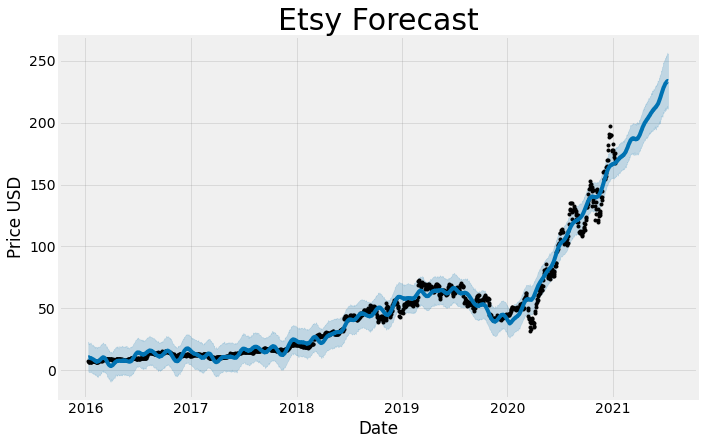

In [76]:
etsy_df = ETSY['Close'].to_frame()
etsy_df.reset_index(level=0, inplace=True)
etsy_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
etsy_df.head()

etsy_model = Prophet(interval_width = 0.95, daily_seasonality=True)
etsy_model.fit(etsy_df)

etsy_forecast = etsy_model.make_future_dataframe(periods = 183)
etsy_forecast = etsy_model.predict(etsy_forecast)

etsy_model.plot(etsy_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Etsy Forecast', fontsize=30);

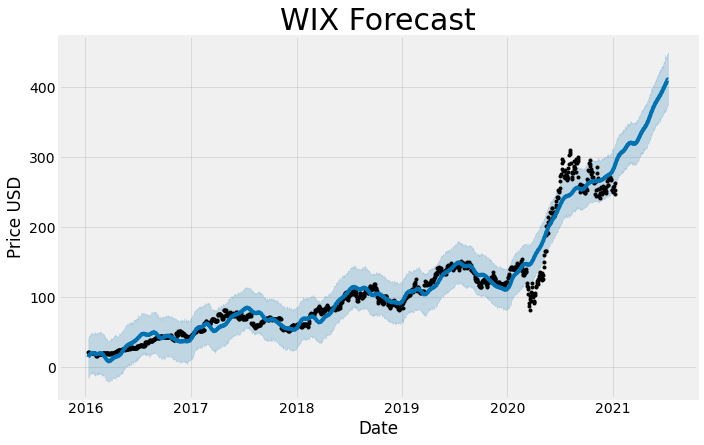

In [77]:
wix_df = WIX['Close'].to_frame()
wix_df.reset_index(level=0, inplace=True)
wix_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

wix_model = Prophet(interval_width = 0.95, daily_seasonality=True)
wix_model.fit(wix_df)

wix_forecast = wix_model.make_future_dataframe(periods = 183)
wix_forecast = wix_model.predict(wix_forecast)

wix_model.plot(wix_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('WIX Forecast', fontsize=30);

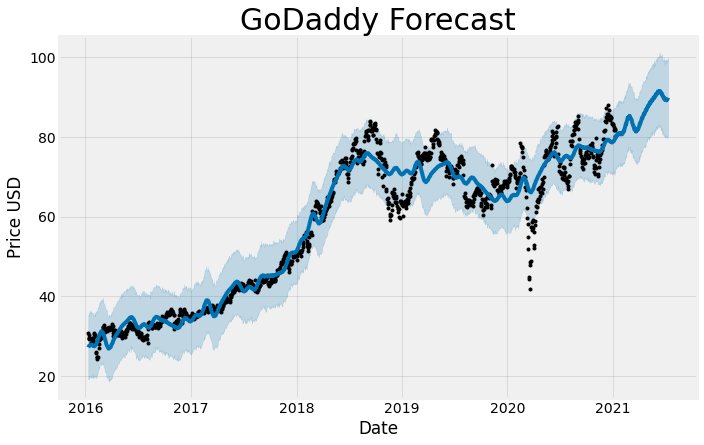

In [78]:
gddy_df = GDDY['Close'].to_frame()
gddy_df.reset_index(level=0, inplace=True)
gddy_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
gddy_df.head()

gddy_model = Prophet(interval_width = 0.95, daily_seasonality=True)
gddy_model.fit(gddy_df)

gddy_forecast = gddy_model.make_future_dataframe(periods = 183)
gddy_forecast = gddy_model.predict(gddy_forecast)

gddy_model.plot(gddy_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('GoDaddy Forecast', fontsize=30);

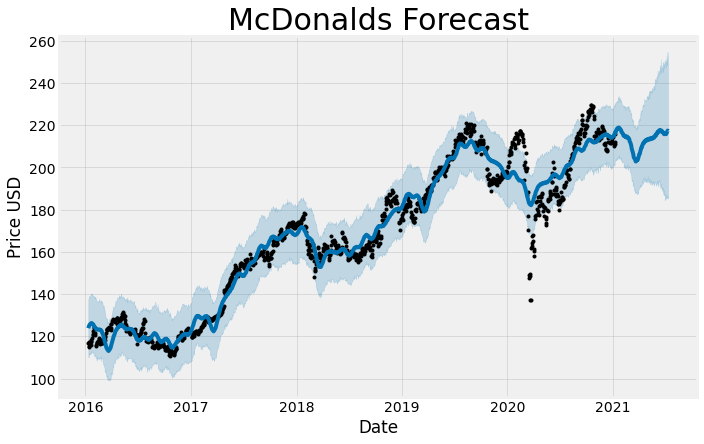

In [79]:
mcd_df = MCD['Close'].to_frame()
mcd_df.reset_index(level=0, inplace=True)
mcd_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
mcd_df.head()

mcd_model = Prophet(interval_width = 0.95, daily_seasonality=True)
mcd_model.fit(mcd_df)

mcd_forecast = mcd_model.make_future_dataframe(periods = 183)
mcd_forecast = mcd_model.predict(mcd_forecast)

mcd_model.plot(mcd_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('McDonalds Forecast', fontsize=30);

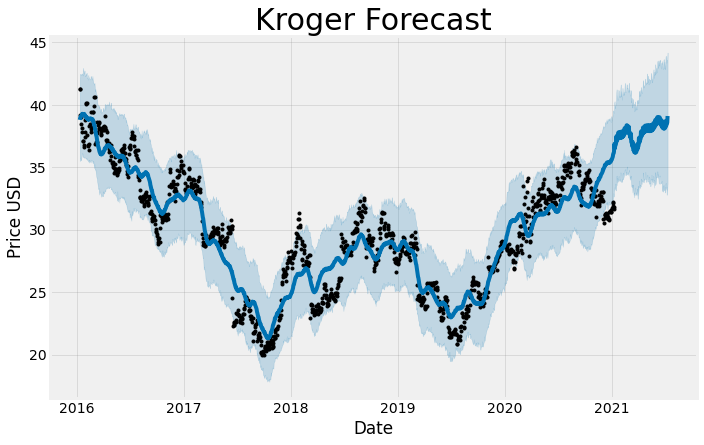

In [80]:
kr_df = KR['Close'].to_frame()
kr_df.reset_index(level=0, inplace=True)
kr_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
kr_df.head()

kr_model = Prophet(interval_width = 0.95, daily_seasonality=True)
kr_model.fit(kr_df)

kr_forecast = kr_model.make_future_dataframe(periods = 183)
kr_forecast = kr_model.predict(kr_forecast)

kr_model.plot(kr_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Kroger Forecast', fontsize=30);

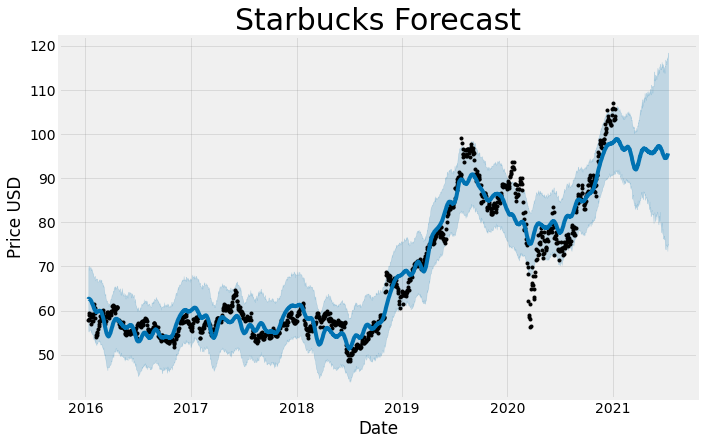

In [81]:
sbux_df = SBUX['Close'].to_frame()
sbux_df.reset_index(level=0, inplace=True)
sbux_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)

sbux_model = Prophet(interval_width = 0.95, daily_seasonality=True)
sbux_model.fit(sbux_df)

sbux_forecast = sbux_model.make_future_dataframe(periods = 183)
sbux_forecast = sbux_model.predict(sbux_forecast)

sbux_model.plot(sbux_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Starbucks Forecast', fontsize=30);

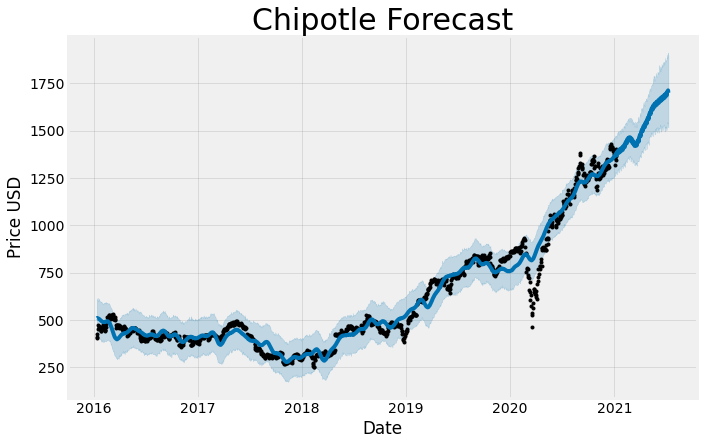

In [82]:
cmg_df = CMG['Close'].to_frame()
cmg_df.reset_index(level=0, inplace=True)
cmg_df.rename(columns = {'Date': 'ds', 'Close': 'y'}, inplace=True)
cmg_df.head()

cmg_model = Prophet(interval_width = 0.95, daily_seasonality=True)
cmg_model.fit(cmg_df)

cmg_forecast = cmg_model.make_future_dataframe(periods = 183)
cmg_forecast = cmg_model.predict(cmg_forecast)

cmg_model.plot(cmg_forecast
                 , xlabel = 'Date'
                 , ylabel = 'Price USD'
#                  , figsize = (12,9)
                )
plt.title('Chipotle Forecast', fontsize=30);

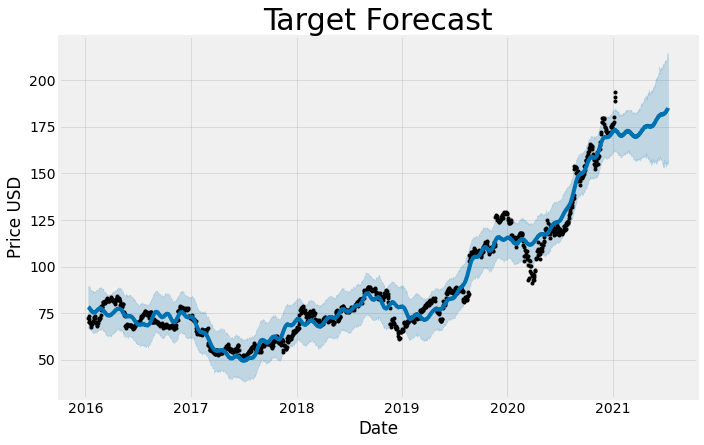

In [83]:
tgt_df = TGT['Close'].to_frame()
tgt_df.reset_index(level=0, inplace=True)
tgt_df.rename(columns = {'Date': 'ds', 'Close':'y'}, inplace=True)

tgt_model = Prophet(interval_width = 0.95, daily_seasonality=True)
tgt_model.fit(tgt_df)

tgt_forecast = tgt_model.make_future_dataframe(periods = 183)
tgt_forecast = tgt_model.predict(tgt_forecast)

tgt_model.plot(tgt_forecast, xlabel = 'Date', ylabel = 'Price USD')
plt.title('Target Forecast', fontsize=30);

Text(0.5, 1.0, 'Walmart Forecast')

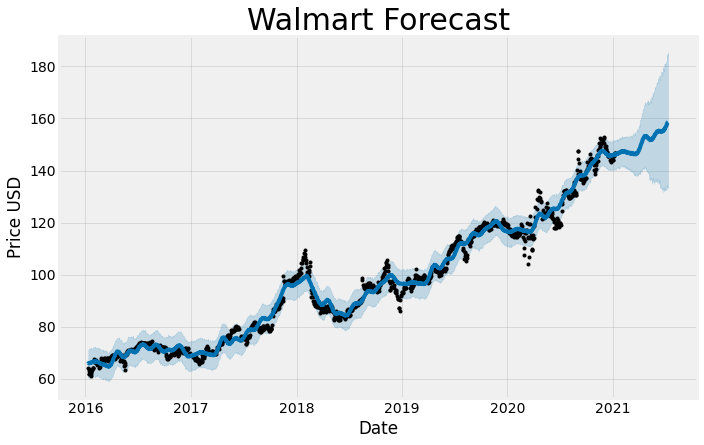

In [84]:
wmt_df = WMT['Close'].to_frame()
wmt_df.reset_index(level=0, inplace=True)
wmt_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

wmt_model = Prophet(interval_width = 0.95, daily_seasonality=True)
wmt_model.fit(wmt_df)

wmt_forecast = wmt_model.make_future_dataframe(periods = 183)
wmt_forecast = wmt_model.predict(wmt_forecast)

wmt_model.plot(wmt_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Walmart Forecast', fontsize=30)


Text(0.5, 1.0, 'Best Buy Forecast')

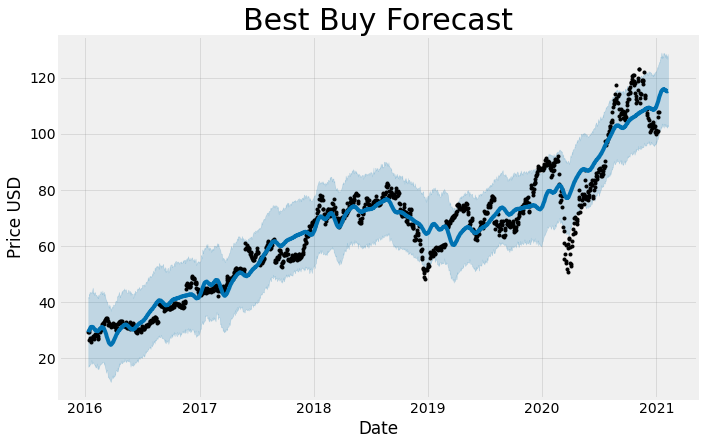

In [85]:
bby_df = BBY['Close'].to_frame()
bby_df.reset_index(level=0, inplace=True)
bby_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

bby_model = Prophet(interval_width = 0.95, daily_seasonality=True)
bby_model.fit(bby_df)

bby_forecast = bby_model.make_future_dataframe(periods = 30)
bby_forecast = bby_model.predict(bby_forecast)

bby_model.plot(bby_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Best Buy Forecast', fontsize=30)

Text(0.5, 1.0, 'Home Depot Forecast')

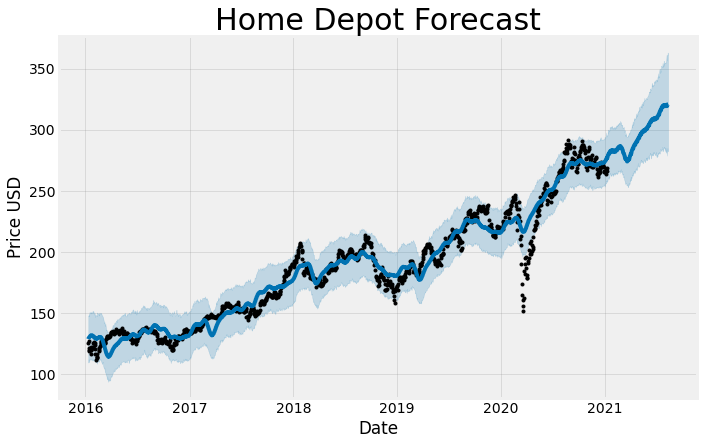

In [86]:
hd_df = HD['Close'].to_frame()
hd_df.reset_index(level=0, inplace=True)
hd_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

hd_model = Prophet(interval_width = 0.95, daily_seasonality=True)
hd_model.fit(hd_df)

hd_forecast = hd_model.make_future_dataframe(periods = 215)
hd_forecast = hd_model.predict(hd_forecast)

hd_model.plot(hd_forecast, xlabel='Date', ylabel = 'Price USD')
plt.title('Home Depot Forecast', fontsize=30)

Text(0.5, 1.0, 'JP Morgan Forecast')

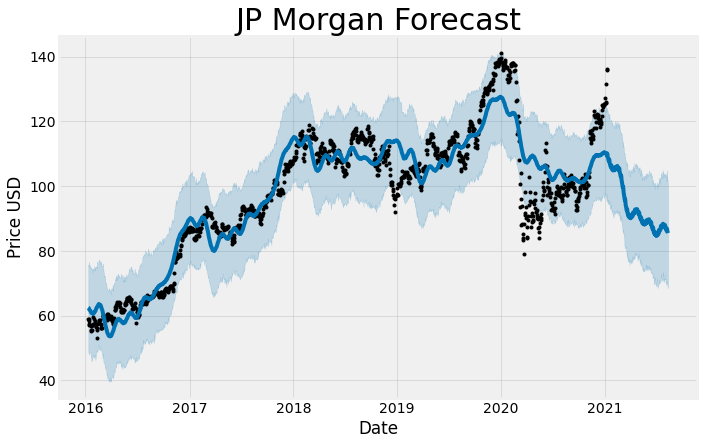

In [87]:
jpm_df = JPM['Close'].to_frame()
jpm_df.reset_index(level=0, inplace=True)
jpm_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

jpm_model = Prophet(interval_width = 0.95, daily_seasonality=True)
jpm_model.fit(jpm_df)

jpm_forecast = jpm_model.make_future_dataframe(periods = 215)
jpm_forecast = jpm_model.predict(jpm_forecast)

jpm_model.plot(jpm_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('JP Morgan Forecast', fontsize=30)

Text(0.5, 1.0, 'Citi Forecast')

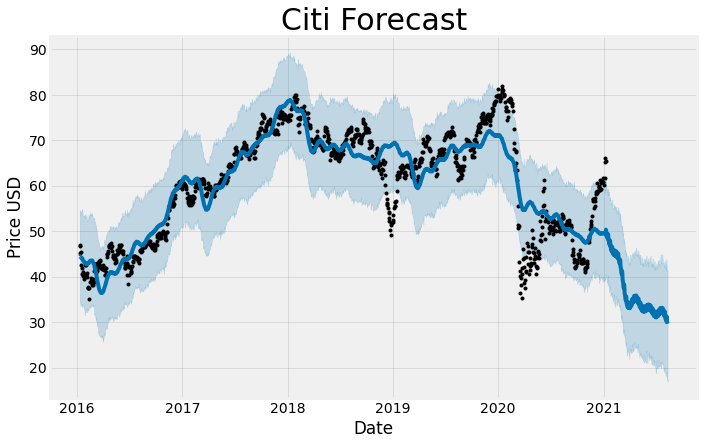

In [88]:
c_df = C['Close'].to_frame()
c_df.reset_index(level=0, inplace=True)
c_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

c_model = Prophet(interval_width = 0.95, daily_seasonality=True)
c_model.fit(c_df)

c_forecast = c_model.make_future_dataframe(periods = 215)
c_forecast = c_model.predict(c_forecast)

c_model.plot(c_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Citi Forecast', fontsize=30)

Text(0.5, 1.0, 'Green Dot Forecast')

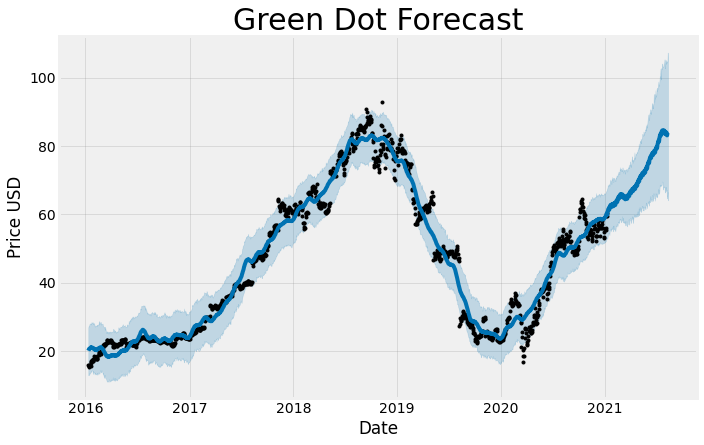

In [89]:
gdot_df = GDOT['Close'].to_frame()
gdot_df.reset_index(level=0, inplace=True)
gdot_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

gdot_model = Prophet(interval_width = 0.95, daily_seasonality=True)
gdot_model.fit(gdot_df)

gdot_forecast = gdot_model.make_future_dataframe(periods = 215)
gdot_forecast = gdot_model.predict(gdot_forecast)

gdot_model.plot(gdot_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Green Dot Forecast', fontsize=30)

Text(0.5, 1.0, 'Paypal Forecast')

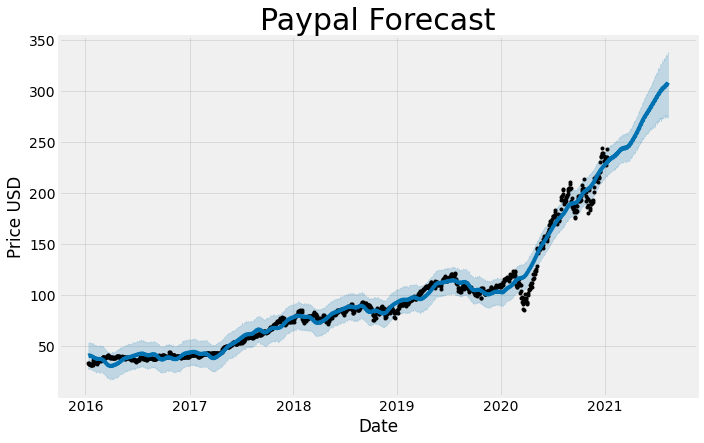

In [90]:
pypl_df = PYPL['Close'].to_frame()
pypl_df.reset_index(level=0, inplace=True)
pypl_df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace=True)

pypl_model = Prophet(interval_width = 0.95, daily_seasonality=True)
pypl_model.fit(pypl_df)

pypl_forecast = pypl_model.make_future_dataframe(periods = 215)
pypl_forecast = pypl_model.predict(pypl_forecast)

pypl_model.plot(pypl_forecast, xlabel='Date', ylabel= 'Price USD')
plt.title('Paypal Forecast', fontsize=30)

In [92]:
pypl_forecast.to_excel('pypl_forecast.xlsx')

In [91]:
pypl_forecast.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2016-01-11  34.048119   27.241843   53.182456    34.048119    34.048119   
1 2016-01-12  34.063196   28.368055   53.033690    34.063196    34.063196   
2 2016-01-13  34.078274   29.040842   52.946658    34.078274    34.078274   
3 2016-01-14  34.093351   27.380333   53.546219    34.093351    34.093351   
4 2016-01-15  34.108429   27.754294   53.873146    34.108429    34.108429   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0        6.479223              6.479223              6.479223  4.695479  ...   
1        6.543961              6.543961              6.543961  4.695479  ...   
2        6.694072              6.694072              6.694072  4.695479  ...   
3        6.830927              6.830927              6.830927  4.695479  ...   
4        6.551228              6.551228              6.551228  4.695479  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0  0.034699      0.034699      0.034699  1.749045      1.749045      1.749045   
1  0.121480      0.121480      0.121480  1.727002      1.727002      1.727002   
2  0.300697      0.300697      0.300697  1.697897      1.697897      1.697897   
3  0.474941      0.474941      0.474941  1.660508      1.660508      1.660508   
4  0.242054      0.242054      0.242054  1.613694      1.613694      1.613694   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  40.527342  
1                         0.0  40.607157  
2                         0.0  40.772346  
3                         0.0  40.924278  
4                         0.0  40.659656  

[5 rows x 22 columns]

# Insights


In [ ]:
Economy: 
1.	1st Quarter in 2020, GDP drops 0.08%, drops further again in 2nd Quarter 9.5% typically signifying a recession.
2.	Both CPI and Unemployment show significant change in April (2nd Quarter). This is during the U.S. initial lock 
    down for Covid-19.
3.	S&P 500 price increased 12.6% in April. This was unexpected since three Economic indicators, showed signs of 
    recession. 
4.	S&P 500 has a high correlation with CPI, 0.78. Its correlation with Unemployment is 0.40, indicating that it 
    doesn’t affect the market.

Stock & YOY Growth:
1.	E-Commerce: Shopify is the overall leader in the space. Its stock is valued in the $1000s and has an average YOY 
    growth of 126.15% in the last 5 years. Its lowest annual return is at 14.67%, whereas ETSY, WIX and GDDY lowest 
    return in the last 5 years have been in the negatives. 
2.	Food: With respect to average YOY return over the last 5 years and stock price, Chipotle beats all three companies. 
    Kroger is the least attractive in terms of growth. Its average growth rate is 0.66%.
3.	Retail: Although Home Depot has the highest stock price its average YOY growth is second lowest. Best Buy average 
    is 31.56% which is about 11%-13% above the other stocks
4.	Finance: The last several years, JP Morgan has been the highest price stock over Citi, Green Dot and Paypal. 
    Middle of 2020, Paypal’s stock price has sky rocketed. Its average YOY growth is 43.49% Both traditional banks, 
    JP Morgan and Citi Bank has an average YOY growth of 15.55% and 7.79% respectively. 


In [ ]:
# 30 day slicing
etsy_30df = ETSY['10/15/2020':'12/11/2020']
shop_30df = SHOP['11/11/2020':'12/11/2020']
wix_30df = WIX['11/11/2020':'12/11/2020']
gddy_30df = GDDY['11/11/2020':'12/11/2020']

kr_30df = KR['11/11/2020':'12/11/2020']
mcd_30df = MCD['11/11/2020':'12/11/2020']
sbux_30df = SBUX['11/11/2020':'12/11/2020']
cmg_30df = CMG['11/11/2020':'12/11/2020']

tgt_30df = TGT['11/11/2020':'12/11/2020']
wmt_30df = WMT['11/11/2020':'12/11/2020']
bby_30df = BBY['11/11/2020':'12/11/2020']
hd_30df = HD['11/11/2020':'12/11/2020']

jpm_30df = JPM['11/11/2020':'12/11/2020']
c_30df = C['11/11/2020':'12/11/2020']
gdot_30df = GDOT['11/11/2020':'12/11/2020']
pypl_30df = PYPL['11/11/2020':'12/11/2020']

etsy_30df